# Processing Earnings Conference Calls
Jessen Hobson, Associate Professor, University of Illinois at Urbana-Champaign <br>
Version 03.05

In [1]:
# for data manipulation
import pandas as pd

In [2]:
# for text manipulation
import re 
# for data processing
import nltk
nltk.download('wordnet')
from nltk import word_tokenize
from nltk import FreqDist
# for graphing (used with NLTK)
import matplotlib.pyplot as plt
# for lemmatization - uses NLTK's lemmatize that was built from Wordnet (large lexical database of English words)
from nltk.stem import WordNetLemmatizer
# set display options
pd.set_option('max_rows', 900)
pd.set_option('max_colwidth', -1) # maximum width
pd.set_option('max_columns', 20)
# Supress unneeded Pandas warnings
pd.options.mode.chained_assignment = None  # default='warn'

[nltk_data] Downloading package wordnet to C:\Users\King
[nltk_data]     Andy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 0.0 Learning Objectives

Key skills examined in this case:
* Natural Language Processing Skills Explored
    * pre-processing and noise reduction
    * tokenization
    * lemmatization
    * keyword extraction
    * sentiment extraction
    * latent topic extraction (discussed only)
* Accounting skills
    * familiarity with corporate communications
    * role of earnings conference calls
    * familiarity with analysts' methods of probing executives
* Python Skills
    * data manipulation in the Pandas library
    * descriptive statistics in the Pandas library
        * `groupby`
    * `list comprehensions`
    * function definitions
        * function use via `.apply()` in Pandas
    * `for loops`
    * text specific
        * string processing methods in Pandas
        * applications of regex to pre-process text
        * word tokenization using the Natural Language Toolkit (NLTK)
        * word lemmatization using NLTK
        * sentiment extraction using a bag of words approach
        * topic extraction using Latent Dirichlet Allocation (LDA) with the genism (discussed only)

# 1.0 Earnings Conference Calls Background

Public companies in the US host earnings calls (via teleconference or webcast) each quarter, shortly after disclosing their quarterly or yearend financial information (earnings press release). Earnings calls are publicly available and are of most interest to current investors, potential investors, equity analysts, external auditors, and business journalists. 

Earnings calls include two components: prepared remarks from the company's executives (typically the Chief Executive Officer, the Chief Financial Officer and Director of Investor Relations at a minimum) and a question and answer session with company executives. Companies can allow the Q&A portion to be open to any participants but typically this is limited to select, invited equity analysts. In the company’s prepared remarks, management typically provides earnings guidance and announcements. These remarks can include forward-looking statements and discussion of non-GAAP measures as well. These prepared remarks are always scripted and rehearsed. On the other hand, the question and answer portion of the earnings conference call is less scripted and thus, potentially more useful listeners interested in learning more about the company.

Audio and/or transcripts of a company’s earnings calls can typically be found on the company’s investor relations website. (Successful searches might include the company’s ticker and the following words: earnings, conference, call, and transcript.) Therefore, this unstructured data is publicly available for analysis. 

**Deliverable 1:** Pick 1 earnings conference call transcript that has not already been picked on this spreadsheet: https://docs.google.com/spreadsheets/d/19TKLMB1nYyobZ--5WmWmYaonDrp_0HPFjam0GmtClH4/edit?usp=sharing. Mark the spreadsheet for the one you pick so that no one else will pick it. Next, copy and paste the text from the transcript to this website so we can use it again next year: https://uiuc.qualtrics.com/jfe/form/SV_1NfIjF6a2QWuu7b. Carefully follow all the instructions on that website and input all information. (For extra karma and love ***AND for 5 extra points for your group***, pick and upload 20 more to the website. Indicate below if you have done this.) 

Next, take the text from ***just the Question and Answer portion*** of the conference call and create a string in our Jupyter notebook called `qa_text`. Hint: Use the triple quote marks (`'''`) to put in the large text. 

In [3]:
# Deliverable 1 Response:
qa_text = '''
Questioner 1 Q1: [I&SS segment] Regarding the upward revision to guidance for the I&SS segment, which was the greater driver, volume upside or product mix improvement? A1: As in the 2nd Quarter, we believe contributions from volume and product mix improvement were roughly the same. Q2: [I&SS segment] You revised down the outlook for fixed asset growth somewhat. Is this due to improved investment efficiency or some other factor? A2: The change reflects our view that improvements in efficiency will allow us to reach our desired levels of capacity without the degree of investment we had initially anticipated. Questioner 2 Q1: [I&SS segment] You mentioned your lack of optimism about the competitive environment for the I&SS segment in FY2020, but it seems that supply/demand conditions in the industry are still good, so how much of a risk do you actually see? A1: It is difficult to answer in numerical terms, but based on our initial outlook, we made plans to build up strategic inventory in the 4th Quarter in anticipation of very strong demand in 1H FY2020 given how much production capacity we have by comparison. However, we will have to ship, during this fiscal year, almost all of the strategic inventory we planned to build for FY2020, raising the issue of whether we can sufficiently meet demand in FY2020. In addition, 0.8-micron image sensors, which have contributed significantly to FY2019 earnings, will be entering their second year of mass production, so we expect our competitors will catch up to some degree and put pressure on prices. These are the main risks, but it goes without saying that because we have yet to factor in any potential impact from the coronavirus outbreak, we will need to reflect that, too, pending further research, etc. Q2: [G&NS segment] In the game business, what was the degree of contraction in free-to-play games in the 3rd Quarter in comparison with the 1st Quarter and the 2nd Quarter, and, looking ahead to FY2020, should we expect the weakness in free-to-play games to have run its course by the end of FY2019? A2: Most of the sharp decline in third-party software is in free-to-play titles. Other software titles in our library of new and existing games are roughly flat YoY, so this highlights the difficulty in predicting trends in free-to-play titles. In other areas, there were not many variances, so we would like to improve the accuracy of our forecasting here. Questioner 3 Q1: [G&NS segment] Regarding the game business, until now I was under the impression from previous presentations that PlayStation Plus subscriptions tend to grow when triggered by the launch of a major title or other catalyst, suggesting this would be a difficult quarter. However, subscriptions went up despite the fact that software sales were not very strong. What is your take on that, and what are your expectations for subscriber numbers looking ahead to the next-generation console? A1: It is a process of trial and error when it comes to securing stable growth in PlayStation Plus subscribers and retaining them more efficiently. As you know, as a part of the price revisions we implemented in August, we made an annual subscription more affordable with the intention of increasing the number of long-term stable users. Also, we included several incentives with the annual subscription such as online multiplayer gaming, free access to some PS4 titles, 100GB of storage for PS4 game saves, and exclusive subscriber discounts. We believe this made more users appreciate the value of the subscription. The number of subscribers tends to increase in the 3rd Quarter every fiscal year, but we would like to achieve more stable growth by inviting users to experience and appreciate these services. Looking ahead to the next-generation console, we aim to increase subscriber numbers as much as possible. There is very little I can disclose about the new console as of yet, but I look forward to sharing more at some point in FY2020 when we are prepared with more details. Q2: [G&NS segment] The FY2020 earnings outlook for the game business is a frequent topic of discussion in the market given that the PS5 is to be launched for the 2020 holiday season. What are your thoughts, if any, on what would happen if we were to reach the end of April, when the earnings outlook is usually disclosed, and the price of the PS5 had still not been revealed? A2: It is still difficult to discuss that at this time, but what I can say is that at present we plan to deliver our earnings outlook at the same time as usual. Questioner 4 Q1: [EP&S segment] The implied 4th Quarter operating income outlook for the EP&S segment is for a substantial loss judging by your full-year operating income outlook. Broken down into the four main product categories, what are your assumptions regarding sales trends/levels, and what nature and size of non-recurring costs are you expecting? Also, how much of a profit improvement can the EP&S segment deliver in FY2020, including from the disappearance of non-recurring costs? A1: Numerically, guidance does imply a 4th Quarter operating loss in the EP&S segment, but as I touched upon in my speech just now, we are expecting to post one-time restructuring costs in the Mobile Communications business, the impact of which is likely to be very significant. However, we are looking closely from various perspectives into how much this can be minimized, and we aim to keep costs as low as possible. We are not expecting anything outside the bounds of ordinary seasonality at present in the other product categories. 3rd Quarter inventory, as I just mentioned, was also kept very much within appropriate levels. At our previous results briefing, we talked about plans to launch some new products in our TV range in the 4th Quarter and, as of now, those plans remain unchanged. However, if concerns regarding the Chinese supply chain were to come to fruition, there is a risk of delays in ramping up some of the products. Q2: [EP&S segment] Can we assume that these one-off factors will disappear in FY2020 and profit will increase? A2: We have yet to put together our targets for FY2020, but our intention is to make a positive start to FY2020 without any negative hangover from past years, and to that end, we will continue to keep firm control on inventory and make solid manufacturing and marketing plans. Q3: [EP&S segment] If approximately 13 billion yen, the remainder of your restructuring budget to be recognized in the 4th Quarter, is incurred in Mobile Communications, you still would have a loss of 35.8 billion yen for the wider EP&S segment. Is that correct? A3: You can assume something along the lines of your analysis, but please understand that we are not disclosing a detailed breakdown. Q4: [G&NS segment] In the game business, I understand that third-party software sales were not good, but what about first-party titles? A4: I am unable to give you a quantitative answer as to how our results differed from our expectations, but I will give you a general impression. We were not able to meet our assumptions for catalog titles in the case of third-party full-length games or for first-party full-length games in general as those expectations were somewhat ambitious. Results in the PlayStation Plus business and elsewhere were more or less as expected. Questioner 5 Q1: [I&SS segment] Where did production capacity stand at the end of the quarter in the I&SS segment? Also, what were wafer inputs and what do you expect inputs will be going forward? A1: Available monthly capacity was roughly 115,000 as of the end of the 3rd Quarter. We had previously assumed 117,000, so this was down slightly. This is due to slight deviations resulting from factors including process mix and is not because we are behind on building out capacity. We expect capacity to be at 124,000 at the end of the 4th Quarter. As for inputs, we were at full capacity in the 3rd Quarter and expect to be at full capacity again in the 4th Quarter. Q2: [Pictures segment] You mentioned having built up your franchises in the Motion Picture business. Could you share your thinking on the investments you undertook in the 3rd Quarter? Your deal with the production company for Peter Rabbit seems to be in line with your current approach, but your investment in the Game Show Network is of a somewhat different nature. Given that you are undertaking a review of unprofitable channels, could you comment on the intent behind that investment? A2: We acquired the 42% stake AT&T had held in the Game Show Network and made it a wholly owned subsidiary. We had previously held a 58% stake. The Game Show Network is a multimedia entertainment company that distributes game shows, including original programming, via cable television in the U.S. A company under its umbrella called GSN Games also offers online and mobile games. Our thinking was that this business unit had potential from a variety of perspectives, so when presented with the opportunity, we increased our stake to 100% in order to be able to make strategic decisions with greater flexibility. Silvergate Media is a company that develops and produces animation for children and also engages in licensing. It produces seven titles for SVOD and cable television. The objective of our investment was to acquire high-quality original IP and creative talent. We have seen this as an extremely attractive category for some time, and when this acquisition opportunity presented itself amidst various dialogues we were having, we acted and made our decision quickly. Questioner 6 Q1: [I&SS segment] You mentioned a better mix and higher volumes in the I&SS segment in the 3rd Quarter. Could you tell us about the per-wafer sales momentum? It seems to have increased considerably in the 2nd Quarter. Is it fair to say it increased by a similar amount in the 3rd Quarter? Inventory fluctuations meanwhile seem to be a negative for profits this year. Could you share any quantitative data you have on that? A1: Per-wafer sales momentum ends up being a discussion of the unit price per wafer, which is not something we disclose, so I will refrain from any quantitative commentary. Making larger sensors reduces the theoretical yield per wafer, which diminishes production yields. Therefore, the average price per sensor needs to be enough to offset that or it will not be possible to maintain the unit price per wafer. As such, in order to correctly maintain the momentum of per-wafer sales or pricing, we need to be certain we are supplying a high added-value product and improve our production yields, or ensure that new products get off the ground as smoothly as possible. These things enable differentiation and we therefore want to continue to focus our efforts on them. On the question of how inventory fluctuations impact profits, we saw a 7.8 billion yen decline in inventory between the 2nd Quarter and the 3rd Quarter, which was a negative for profits. I believe that the decline reduced profits by 10 billion yen or more on a YoY basis. Q2: [G&NS segment] In striving for a “smooth transition” in the G&NS segment in FY2020, could you describe to the extent possible where you have visibility and where you lack visibility in terms of, for example, development or marketing costs you might be able to control, or things that remain uncertain regarding pricing or volumes perhaps? A2: Firstly, we believe that we absolutely have to control our bill of materials cost. This ends up being a question of what we recognize as costs and is a point over which we must exercise control. Then there is our initial ramp-up. Our manufacturing and marketing efforts need to be solid so that we can determine how many units we need, and then produce the appropriate volume. Given that we compete on price, it is extremely difficult to comment at present on where we lack visibility. In addition, pricing also determines the nature of our promotion efforts and how much we spend because of the balance that needs to be struck, so it is difficult to comment on all of that at this point in time. In terms of making the transition as smooth as possible, we are engaged in ongoing discussions based on our belief that we should devise the best-balanced approach that enables us to ensure that the next-generation console is profitable over the course of its life. Questioner 7 Q1: [I&SS segment] What sort of contribution should we expect from products other than image sensors in the I&SS segment in FY2020 and beyond? A1: That would be sensing inclusive of industrial equipment, factory automation, automotive, and ToF applications. We have said for some time that we want to bring the proportion of products other than image sensors for mobile applications to around 30% by 2025. We have not made any particular changes to that objective and are doing what we need to toward that end. In the short term, our ToF sensors for mobile applications are getting off to a smooth start, so I believe that we will be able to tell you in FY2020 or thereafter what percentage of the business they will likely come to represent. We do not need to invest any capex specifically for ToF sensors, so we see them as having substantial potential. We also believe that we can derive an appropriate level of profit margin from them. Q2: You said that you will be able to increase input without investing as much as you had anticipated. Is there any change in the 700 billion yen figure under your mid-range plan, including in terms of how much outsourcing you intend to use? A2: We have been able to achieve a 15-billion-yen reduction in FY2019 thanks to greater investment efficiency. However, at present we do not expect any major change in our plan to spend 700 billion yen over the timeframe covered by the mid-range plan. The fiscal year ending March 31, 2022 will be the year that we release our next mid-range plan covering 2021-2023, so I believe we will be able to share our thinking on investment over that three-year span at that time. Questioner 8 Q1: [I&SS segment] How is inventory in the I&SS segment likely to change in the 4th Quarter? That likely depends on demand, but could you comment on the general direction? It seems business was extremely brisk in the 3rd Quarter, but with a slight downshift in customer demand underway, do you think that, excluding the impact from the coronavirus outbreak, there will be so much demand in January-March and April-June that you will not be able to produce enough even at full capacity? A1: Our original intention for the 4th Quarter was to build up strategic inventory for 1H FY2020. Thereafter, customer demand became so strong that it proved difficult to engage in strategic stockpiling, and we had no choice but to keep shipping what we had. I am not certain how meaningful it would be to try to describe our expectations exclusive of the impact from the coronavirus, but we believe that we may see some instances of slower demand. Taking all of this into account, we believe that 4th Quarter inventory may not change much, increasing only slightly versus the 3rd Quarter. That said, we have not collected enough information to say anything definitive. Q2: [I&SS segment] What is your output plan for January-March? A2: We do not disclose output plans, but our production lead time is 5-6 months, so please deduce what you can from that. Cautionary Statement: Please be aware that, in the summary above, statements made with respect to Sony‘s current plans, estimates, strategies and beliefs and other statements that are not historical facts are forward-looking statements about the future performance of Sony. Forward-looking statements include, but are not limited to, those statements using words such as “believe,” “expect,” “plans,” “strategy,” “prospects,” “forecast,” “estimate,” “project,” “anticipate,” “aim,” “intend,” “seek,” “may,” “might,” “could” or “should,” and words of similar meaning in connection with a discussion of future operations, financial performance, events or conditions. These statements are based on management’s assumptions, judgments and beliefs in light of the information currently available to it. Sony cautions investors that a number of important risks and uncertainties could cause actual results to differ materially from those discussed in the forward-looking statements, and, therefore, you should not place undue reliance on them. Investors also should not rely on any obligation of Sony to update or revise any forward-looking statements, whether as a result of new information, future events or otherwise. Sony disclaims any such obligation. For additional information as to risks and uncertainties, as well as other factors, that could cause actual results to differ from those discussed in the forward-looking statements, please refer to Sony’s most recent Form 20-F, which is on file with the U.S. Securities and Exchange Commission.
'''

### Our group did the 20 conference calls for extra credit ###

**Deliverable 2:** Take on the role of either (i) a potential investor or (ii) an external auditor of the company that you picked. Read through the question and answer portion of the conference call that you have captured and answer the following questions using one or two sentences each:
* (A) What are some of the words that are frequently used in the conference call? Would it be important to pay attention to and take note of these words from your point of view as an auditor or investor? Why?
* (B) What are some of the unique, rare, or infrequently used words in the conference call? Would it be important to pay attention to and take note of these words from your point of view as an auditor or investor? Why?
* (C) What is the general sentiment of analysts and managers in this company during this earnings conference call? In other words, what is the sentiment of analysts and managers? Would it be important to pay attention to and take note of the sentiment from your point of view as an auditor or investor? Why? (For example, see https://onlinelibrary.wiley.com/doi/full/10.1111/j.1540-6261.2011.01705.x, https://www.sciencedirect.com/science/article/abs/pii/S0378426611002901#!; etc.)
* (D) What are some of the most important topics that are being discussed in the conference call? Would it be important to pay attention to and take note of these topics from your point of view as an auditor or investor? Why?

# Deliverable 2 Response:
A) Some words that are frequently used in the conference call of Sony are statements that are forward looking such as "believe", "plan", "improve", "forecast","new", and "anticipate". From an investor standpoint, it would be important to make note of these words because it is important for a company to use language that indicates they are forward looking and intend to be in business for a long time. It is also important from an investor standpoint to see that Sony is looking to innovate and continuously improve and create new products and systems, especially in such a lucrative industry.
 
B) A unique and rare word found in the Q&A portion is "differentiation". As an investor, it is definitely important to take note of this word because it indicates how Sony feels they can differentiate from the other competitors, which makes Sony a unique company. Sony also used the work "free" in the Q&A portion when talking about their free-to-play games. This was also something important for a potential investor to note because this word indicates that there is a sector of Sony that does not require their customers to pay, which indicates that there will not be any profit will be made from the segment.
 
C) The general sentiment that the managers and analysts presented were overall positive. Although there were definitely questioners that questioned certain decisions Sony had made and were going to make, each person who answered was able to defend the decisions made by the company and continued to use forward looking statements. There were many questions that had vague answers provided, but overall a positive sentiment was used. From an investor standpoint, it is definitely important to see the sentiment of the conference call because it indicates how the managers feel about the company's future and whether it will continue to be profitable or not. The overall sentiment is also a representation of Sony's management itself, and whether they establish a positive tone that is emphasized for all their employees to have as well. Potential investors want to invest in companies that also have good employee satisfaction because it plays an important factor in a company’s success
 
D)Some important topics that were discussed were about the revision and guidance about the I&SS (Imaging & Sensing Solutions) segment and management's outlook on the segment. Many other questions were also about Sony's videogame systems and their media entertainment subsidiary they own and whether they see those sales continuing to grow. From the point of an investor, especially in a technology and product innovation company, it is important that the company an investor is thinking about potentially investing in is continuously looking to innovate and release more products to continue to be profitable and relevant to consumers. It shows that they want to grow each quarter and continue to be a top competitor in the industry.


# 2.0 Natural Language Processing (NLP) Background

Your answers to these questions are necessarily subjective and depend upon your ability to subjectively take note of these factors. Thus, your answers to these questions are unique to you and might be rather different from someone else’s answers. Next, we will use natural language processing to analyze the text of this conference call and start to get some more systematic and objective answers to the questions above. 

What is Natural Language Processing? <br>
Natural language processing (NLP) is the intersection of several fields concerned with machines processing text and language data. Some of the applications of NLP that you have probably been most impacted by include the following:
* Machine translation, such as Google Translate (https://translate.google.com/)
* Speech recognition, such as Apple's Siri and Amazon's Alexa
* Chatbots, such as Insomnobot - 3000 (http://insomnobot3000.com/) 
You have probably experienced the power of these applications in your day-to-day activities and while not yet perfected, these applications and underlying technology are continuing to advance as they improve through machine learning. 

Other applications of NLP that you have probably been less impacted by personally include:
* Sentiment extraction
* Concept/topic extraction
These two applications can have significant business impact by providing useful business insights for a variety of stakeholders. These NLP applications will be the focus of this case in which you will gain an introduction to NLP by focusing on extracting meaning from written text.

**Deliverable 3:** (A) What type of object in Python is the text you entered? (B) Calculate the total number of characters in `qa_text`. (C) Use indexing to look at just the characters between character 100 and character 120.

In [4]:
# Deliverable 3 Response:
print(type(qa_text))
print(len(qa_text.replace(' ','')))
print(qa_text[99:120])

<class 'str'>
14093
ich was the greater d


In [5]:
# first character is indexed at 1
print(qa_text[1])

Q


# 3.0 NLP Pre-processing

## 3.1 NLP Tokenization

Your goal is to use NLP to systematically and objectively derive meaning from the question and answer portion of the earnings conference call. So far, the big grouping of characters that you have is not very helpful. In fact, it does not really make much sense to analyze characters. What makes more sense is to analyze words. The process of tokenization in NLP takes a string and divides it into smaller parts, such as words. 

**Deliverable 4:** (A) Use the popular `word_tokenize` function from the Natural Language Toolkit (NLTK) to tokenize `qa_text`, and call this `tokens` (e.g., https://www.guru99.com/tokenize-words-sentences-nltk.html; https://www.nltk.org/). (B) What type of Python object is `tokens`? (C) How many total tokens do you now have? (D) Print tokens 100-120. (E) While placing the text into words helps, looking at the analysis above clearly shows some problems. Without reading ahead, write down what still needs to be fixed so that analysis will be easier.

In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\King
[nltk_data]     Andy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
# Deliverable 4 Response:
tokens = nltk.word_tokenize(qa_text)
print(type(tokens))
print(len(tokens))
print(tokens[99:120])
print('special characters are also counted as tokens, which, however, should be ignored')

<class 'list'>
3274
['efficiency', 'will', 'allow', 'us', 'to', 'reach', 'our', 'desired', 'levels', 'of', 'capacity', 'without', 'the', 'degree', 'of', 'investment', 'we', 'had', 'initially', 'anticipated', '.']
special characters are also counted as tokens, which, however, should be ignored


## 3.2 Consistent Case

At least four major obstacles remain in the way of using this text. The overarching/overall problem is that not all of the text is useful. First, we have some words that are duplicated because one is in upper case and the other is in lowercase. Second, some of these tokens are not words at all, but rather are punctuation. Third, some tokens are just single characters, and thus, not very useful for analysis. Fourth, some of the tokens, even though they are words, are not very meaningful. You will address each of these obstacles one by one.

First, make all of the words in your token list lowercase. Luckily, Python has a pre-built function which makes strings lowercase. You have a list of strings, so you can use this function, but since you have a list, you will need to go through each token in your list and make each one lowercase. There are at least two ways to do this. The traditional programming way to do this is to use a `for loop`. The more “Pythonic” way to do this is a `list comprehension`. Use both methods and compare and contrast them. The for loop is used for many purposes and is not specifically created to deal with lists. Thus, there are three parts to using the for loop. One, you will create a blank list called `low_tokens`. Two, you will create a for loop that loops through each token in your `tokens` list. Finally, you will make each token lowercase and append it to `low_tokens`. 

List comprehensions are very useful because they are made to work with lists and to return a list. Thus, a list comprehension is more efficient and easier to write than a for loop for the same purpose. A list comprehension has the following basic format: `new_list = [expression for item in old_list]`. (Finally, a third way to do this, would be to go back to `qa_text` and make the whole string lowercase using string operations (the string module) and then tokenize the string. We don’t have you do this so you can practice using list comprehensions and for loops.)

**Deliverable 5:** (A) Use a for loop to make all the tokens in the `tokens` list lowercase. Call this `low_tokens`. Print the tokens 100-120. (B) Use a list comprehension to make all the tokens in the `tokens` list lowercase. Call this `low_tokens`. Print the tokens 100-120. (C) Compare and contrast these two methods. Which was easier for you? Why?

In [8]:
# Deliverable 5 Response:

# for loop method
low_tokens = []
for i in tokens:
    low_tokens.append(i.lower())
print(low_tokens[99:120])

# list comprehension method 
new_list = [i.lower() for i in tokens]
print('-'*50)
print(new_list[99:120])


['efficiency', 'will', 'allow', 'us', 'to', 'reach', 'our', 'desired', 'levels', 'of', 'capacity', 'without', 'the', 'degree', 'of', 'investment', 'we', 'had', 'initially', 'anticipated', '.']
--------------------------------------------------
['efficiency', 'will', 'allow', 'us', 'to', 'reach', 'our', 'desired', 'levels', 'of', 'capacity', 'without', 'the', 'degree', 'of', 'investment', 'we', 'had', 'initially', 'anticipated', '.']


The list comprehension is easier as there are less codes to write and list comprehension method looks cleaner. 

## 3.3 Remove Punctuation

The second obstacle to overcome to make this text useful is to remove punctuation from our text (or said another way, replace or substitute each punctuation mark with nothing). There are three ways to do this: 
* (a) going back to your string `qa_text` and taking out the punctuation and then tokenizing the string and making it lowercase again, 
* (b) using a for loop on the `low_tokens` list, or 
* (c) using a list comprehension on the on the `low_tokens` list. 

Use whichever method you would like to practice most. There are a lot of different possible punctuation marks that need to be removed. I recommend that you use something called regular expressions (or regex) to build a phrase/pattern that removes all punctuation at once. Regex can be rather complex, so search online for a good example and test it out (for example here: https://regexr.com/).

**Deliverable 6:** Using any of the three methods above, remove all punctuation from your token list and call it `low_tokens2`. Print the tokens 100-120.

In [9]:
# Deliverable 6 Response:

# list comprehension method
new_text = re.sub(r'[^\w\s]','', qa_text)
low_tokens2 = [i.lower() for i in word_tokenize(new_text)]
print(low_tokens2[99:120])

['2', 'q1', 'iss', 'segment', 'you', 'mentioned', 'your', 'lack', 'of', 'optimism', 'about', 'the', 'competitive', 'environment', 'for', 'the', 'iss', 'segment', 'in', 'fy2020', 'but']


## 3.4 Remove Small Tokens

The third obstacle to overcome is to eliminate small useless tokens. This is especially important if you used a for loop or list comprehension in the last step, since you will have many blank tokens, (e.g., `'''`). Use either a for loop or a list comprehension to do this. Use the method you did *NOT* use last time. Remember the basic syntax for list comprehensions and for loops:

`[expression for item in list if conditional]` (another way to say this is “do this to the item in the list if this condition is met)

```
for item in list:
    if conditional:
        expression
```

**Deliverable 7:** Remove all tokens less than 2 characters long. Print the tokens 100-120.

In [10]:
# Deliverable 7 Response:

# for loop method
low_tokens3=low_tokens2
for i in low_tokens3:
    if len(i) < 2:
        low_tokens3.remove(i)
print(low_tokens3[99:120])

['iss', 'segment', 'you', 'mentioned', 'your', 'lack', 'of', 'optimism', 'about', 'the', 'competitive', 'environment', 'for', 'the', 'iss', 'segment', 'in', 'fy2020', 'but', 'it', 'seems']


## 3.5 Remove Stop Words

### 3.5.1 Need for Stop Words

With three obstacles cleared from our way, examine some of the most frequent words in the question and answer portion of your conference call. 

**Deliverable 8a:** Use NLTK’s `FreqDist()` function to plot the most frequent tokens in `low_tokens3`. What is the most frequent word? In general, are these words very useful in helping you to understand what is happening in this earnings conference call? Starting from the most frequent word in the graph, which is the first word that seems helpful? 

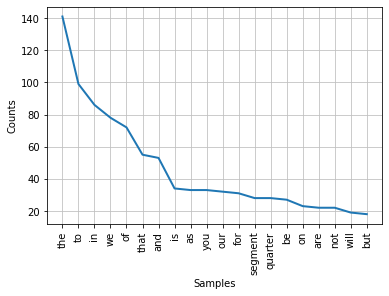

In [11]:
# Deliverable 8a Response:

FreqDist(low_tokens2).plot(20)

the most frequent word is 'the', the word is not very useful. The first word that is kind of useful is 'segment'.

### 3.5.2 Eliminating Stop Words

If the Q&A portion of your conference call is like most others, nearly all of the most frequent words are not that useful. Thus, you need to clear the fourth obstacle discussed above—eliminating useless words. In general the removal of these obstacles, all of this text pre-processing, has two broad categories, noise reduction and normalization. You have been doing noise reduction. This is the process of removing text and other data that is not critical to understanding the fundamental message in the text. Decisions about what text to remove will depend on the goal of the analysis, but normally includes removing punctuation, html tags and stop words. Removing stop words is your next task. Stop words are common words that add little to the meaning of the text, such as "a", "and", "or", etc. Your next step is to compare your list of tokens to a list of stop words and remove any tokens in the stop words list. 

There are many pre-made stop word lists (e.g., from NLTK and the Stanford NLP group), but you will use a custom-made stop word list for this case that will be provided to you. Download the following file and use the code provided here to load the stop word list, after changing the file location to wherever you downloaded the file. 

In [12]:
# change the folder/path
stop1 = pd.read_csv('/Users/King Andy/Desktop/2020 Spring/accy 575 da app/conference call case/stop_words_list.csv', header=None, encoding = "ISO-8859-1")
stop = stop1[0].tolist()
#print(stop)

**Deliverable 8b:** Now, use a for loop or list comprehension to eliminate stop words from `low_tokens3`. Call this new list `low_tokens4`. Once again, print the tokens 100-120. Additionally, once again use NLTK’s `FreqDist()` function to plot the most frequent tokens. Do the words displayed in these two outputs seem more useful? Which word would you like to explore more thoroughly?

In [13]:
# Deliverable 8b Response:
low_tokens4 = [i for i in low_tokens3 if i not in stop]
print(low_tokens4[99:120])

['raising', 'issue', 'sufficiently', 'meet', 'demand', 'fy2020', 'addition', '08micron', 'image', 'sensors', 'contributed', 'significantly', 'fy2019', 'earnings', 'entering', 'year', 'mass', 'production', 'expect', 'competitors', 'catch']


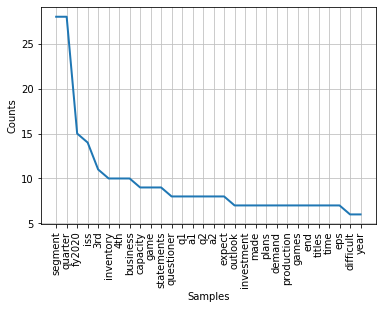

In [14]:
FreqDist(low_tokens4).plot(30)

Yes, they are more useful after the elimination of those stop words. We want to explore more about words"fy2020","inventory","capacity","outlook","investment", and "production".

## 3.6 Eliminating Small Tokens Again

Make one more change to see if you can derive some use from looking at these most frequent words. 

**Deliverable 8c:** Eliminate all tokens less than 5, 6, 7, 8, 9, or 10 characters (you pick which works best), and print the frequency distribution again. What do you learn? What would you like to investigate? Now, regardless of your choice, eliminate all tokens less than 5 characters, and create a new list called `low_tokens5`.

In [15]:
# Deliverable 8c Response:
low_tokens5 = [i for i in low_tokens4 if len(i)>4]
FreqDist(low_tokens5)

FreqDist({'segment': 28, 'quarter': 28, 'fy2020': 15, 'inventory': 10, 'business': 10, 'capacity': 9, 'statements': 9, 'questioner': 8, 'expect': 8, 'outlook': 7, ...})

After we eliminate tokens of less than 4 characters, now we obtain words that are more relevant and contain more information. We would like to investigate "fy2020", "segment", "inventory", and "capacity", and "outlook". 

## 3.7 Normalization/Lemmatization

One final obstacle that we have not yet discussed occurs when a test has many versions of the same word. For example, “questions” and “question” have very similar meanings and most of the time you would not want to analyze these as two separate words. Fixing this obstacle is called normalizing the text. Normalization, also called lemmatization, refers to the process of standardizing similar words so that they can be processed together. For example, lemmatizing a word will change each word to its lemma, or its cannonical or root form. For example, it would change "plays" to "play". Thus, a subsequent text analysis will treat both of these words as one word, "play", instead of two different words. 

**Deliverable 9a:** Use the following text to print a string and the tokens from that string:
```python
toy_text = 'Can I ask some questions, a multi-part question? My question is about the cacti and geese lines. \
Has the FDA study and the other studies been done yet?'
print(f'This is the string text: \n{toy_text}')
toy_tokens = nltk.word_tokenize(toy_text)
print(f'\nThese are the tokens: \n{toy_tokens}')
```

Next, use a for loop or list comprehension to lemmatize each token. Specifically, use NLTK’s `WordnetLemmatizer()`. Next, print the now lemmatized tokens. Finally, write a sentence or two about how the text changed when it went from the initial string to the final lemmatized tokens.

**Deliverable 9b:** Next, use this same technique, via a for loop or a list comprehension, to lemmatize the tokens in `low_tokens5`. Call this new list `low_tokens6` and print the frequency distribution again.

**Deliverable 9c:** Finally, pick one interesting, frequently used token from the Q&A of your conference call and search for it in your string. You can automate this or just do it by hand. Print the phrase with 5 words before and after the token. Do you learn anything from looking for this word?

In [16]:
# Deliverable 9 Response:
toy_text = 'Can I ask some questions, a multi-part question? My question is about the cacti and geese lines.Has the FDA study and the other studies been done yet?'
print(f'This is the string text: \n{toy_text}')
toy_tokens = nltk.word_tokenize(toy_text)
print(f'\nThese are the tokens: \n{toy_tokens}')

This is the string text: 
Can I ask some questions, a multi-part question? My question is about the cacti and geese lines.Has the FDA study and the other studies been done yet?

These are the tokens: 
['Can', 'I', 'ask', 'some', 'questions', ',', 'a', 'multi-part', 'question', '?', 'My', 'question', 'is', 'about', 'the', 'cacti', 'and', 'geese', 'lines.Has', 'the', 'FDA', 'study', 'and', 'the', 'other', 'studies', 'been', 'done', 'yet', '?']


In [17]:
# 9a
lemmatizer = WordNetLemmatizer()
res = []
for i in toy_tokens:
    res.append(lemmatizer.lemmatize(i))
print(res)

['Can', 'I', 'ask', 'some', 'question', ',', 'a', 'multi-part', 'question', '?', 'My', 'question', 'is', 'about', 'the', 'cactus', 'and', 'goose', 'lines.Has', 'the', 'FDA', 'study', 'and', 'the', 'other', 'study', 'been', 'done', 'yet', '?']


it changes all the plural words to singular words. for example, 'questions' becomes 'question'

In [18]:
# 9b
lemmatizer = WordNetLemmatizer()
low_tokens6 = []
for i in low_tokens5:
    low_tokens6.append(lemmatizer.lemmatize(i))
FreqDist(low_tokens6)

FreqDist({'segment': 28, 'quarter': 28, 'fy2020': 15, 'product': 10, 'inventory': 10, 'business': 10, 'statement': 10, 'capacity': 9, 'questioner': 8, 'investment': 8, ...})

# 9c
we choose 'inventory'

1.plans to build up strategic inventory in the 4th Quarter in 

2.almost all of the strategic inventory we planned to build for 

3.3rd Quarter inventory, as I just mentioned, was 

4.to keep firm control on inventory and make solid manufacturing and 

5.amount in the 3rd Quarter? Inventory fluctuations meanwhile seem to 

6.On the question of how inventory fluctuations impact profits, we saw

7.7.8 billion yen decline in inventory between the 2nd Quarter and

8.How is inventory in the I&SS segment likely

9.was to build up strategic inventory for 1H FY2020. Thereafter, customer 

10.we believe that 4th Quarter inventory may not change much, increasing

We learned Sony have a plan to bulid a strategic inventory. And the inventory fluctuated and impacted profit before 4th quarter. They believe the inventory will not change much in 4th quarter. 

# 4.0 NLP using Pandas in a DataFrame with Many Conference Calls

## 4.1 Load and Examine the DataFrame

At this point you have learned and practiced many of the basics of NLP. Further, you have likely seen that these techniques can be useful in cleaning up a text and eliminating less useful information, toward achieving the goal of systematically and objectively deriving meaning from the question and answer portion of the earnings conference call. However, the real power in these techniques comes when you want to analyze many different texts / strings. In this next part of the case, you will be given code that will allow you to see some of these benefits. Additionally, you will develop one more skill, calculating sentiment.

Use the code to load a pickle file to a DataFrame. This DF contains the Q&A portions of many conference calls from many companies. The comments of all executives and employees of the companies have been removed, so all that remains are the questions and responses of the analysts. Thus, the DF can give us an idea of what the analysts that follow the company are concerned about. Additionally, the DF has one row for each person each time they speak (from the time they start speaking until someone else starts speaking). So, the level of aggregation of the DF is person/statement. 
```python
df = pd.read_pickle(r'C:\Users\jlhobson\Documents\Data Analytics General\EYARC\Conference Call Case\cc_case_data_sp2020.p')
```

**Deliverable 10a:** Use the code provided above to load the DataFrame. 

The key columns from the DF are as follows:
* `company_name` - name of the company
* `ticker` - company ticker 
* `date` - date of the earnings conference call
* `speaker` - analyst who is speaking
* `text` - the original text of the analyst’s text
* `tokens` - cleaned and lemmatized tokens
* `frequent` - tokens that appear frequently in the text (specifically, each token in this list appears at least 800 times in the whole DataFrame).
* `rare` - tokens that appear infrequently in the text (specifically, each token in this list appears at most 80 times in the whole DataFrame).

Discuss in a few sentences why it would it be useful for an auditor or investor to know what analysts are saying about a company the auditor or investor is interested in? Next, write potential benefits of including frequent and infrequent (rare) tokens. How could these columns help an auditor or investor quickly gain some understanding of what the analyst is saying?

Next, let’s explore this DF a bit. 

**Deliverable 10b:** How many unique companies are represented in the dataset? How many conference calls are there per company, on average? How many analyst discussions are there per conference call, on average?

In [19]:
# Deliverable 10 Response:
df2 = pd.read_pickle(r'C:\Users\King Andy\Desktop\2020 Spring\accy 575 da app\conference call case\cc_case_data_sp2020.p')
df2.head()

,company_name,ticker,date,speaker,text,tokens,frequent,rare
58,Alcoa Corporation,AA,"Oct. 17, 2018 9:50 PM",Piyush Sood,"with Morgan Stanley. Please go ahead. Roy and Bill, congratulations on a strong quarter. Good to see a large $200 million buyback plan, what was your thinking about starting with only a buyback and not a mix of a regular say, a 1% small dividend and the remaining through buyback. Just want to understand the thinking behind the decision?","[ahead, bill, congratulation, strong, quarter, good, large, buyback, plan, thinking, starting, buyback, mix, regular, small, dividend, remaining, buyback, understand, thinking, decision]","[decision, congratulation, small, buyback, good, starting, mix, large, strong, quarter, plan, understand, dividend, thinking, ahead]",[]
59,Alcoa Corporation,AA,"Oct. 17, 2018 9:50 PM",Piyush Sood,"Roy and Bill, congratulations on a strong quarter. Good to see a large $200 million buyback plan, what was your thinking about starting with only a buyback and not a mix of a regular say, a 1% small dividend and the remaining through buyback. Just want to understand the thinking behind the decision?","[bill, congratulation, strong, quarter, good, large, buyback, plan, thinking, starting, buyback, mix, regular, small, dividend, remaining, buyback, understand, thinking, decision]","[decision, congratulation, small, buyback, good, starting, mix, large, strong, quarter, plan, understand, dividend, thinking]",[]
60,Alcoa Corporation,AA,"Oct. 17, 2018 9:50 PM",Piyush Sood,"Fair enough. And one more from me, and I'll get back in the queue. So the U.S. MCA has been signed, and there is a possibility that we could see Section 232 Tariffs in calendar converted into quaters. So if that happens, your import bill will come down, but what do you think that does to U.S. Midwest premiums? Should we expect to floor in the high teens cents per pound at this point assuming that it's more like a duty paid premium at this point?","[fair, back, queue, mca, signed, possibility, section, tariff, calendar, converted, quaters, import, bill, midwest, premium, expect, floor, high, teen, cent, pound, point, assuming, duty, paid, premium, point]","[expect, point, back, tariff, assuming, fair, high]","[cent, midwest, quaters, converted, duty, mca]"
61,Alcoa Corporation,AA,"Oct. 17, 2018 9:50 PM",Piyush Sood,"And sorry one more question, and this is more to just clarify a comment. Bill, when we were thinking about making a sequential bridge 3Q versus 4Q, should we exclude $60 million price mix benefit in the Alumina segment? And is there any other 3Q bridge item you think it's non-repeatable?","[clarify, bill, thinking, making, sequential, bridge, 3q, versus, 4q, exclude, price, mix, benefit, alumina, segment, 3q, bridge, item, nonrepeatable]","[price, clarify, making, item, 4q, segment, mix, benefit, 3q, thinking, versus]","[nonrepeatable, alumina]"
64,Alcoa Corporation,AA,"Oct. 17, 2018 9:50 PM",David Gagliano,"with BMO Capital Markets. Please go ahead. Hi, thanks for taking my questions. I just have a -- I have a two or three, relatively minor questions, but I just wanted to cross a few off of the list in terms of the numbers here. First of all, the $30 million quarter-over-quarter improvement in EBITDA contribution from flat-rolled business versus the second quarter, is that new level of EBITDA contribution for flat-rolled reasonable moving forward?","[capital, market, ahead, taking, question, minor, question, wanted, cross, list, term, number, quarteroverquarter, improvement, ebitda, contribution, flatrolled, business, versus, quarter, level, ebitda, contribution, flatrolled, reasonable, moving, forward]","[market, level, moving, number, taking, term, wanted, capital, question, ahead, contribution, quarter, business, improvement, versus, forward, ebitda]","[flatrolled, minor]"


10a

what analysts say about a company reflect the market impression evaluation of the company. It can easily direct capital into or out from the company. 

These tokens can provide a quick and general "description" about the transcrit. It shows what the company is trying to convey and what the company is focusing on. 

In [20]:
# 10b
c_uni = df2['ticker'].unique()
print(len(c_uni))
print(len(df2.groupby(['ticker','date']))/len(c_uni))
print(len(df2)/len(df2.groupby(['ticker','date'])))

3696
1.3211580086580086
18.71841081302478


## 4.2 Sentiment

### 4.2.1 Calculate Sentiment

Examining these frequent and rare keywords does speed up the process of understanding what is being said. A second way to gather meaning from the text would be to gain an understanding of what analysts are feeling, or in other words, their sentiment. We can do this by using what is frequently called a bag-of-words approach. That is, if we were interested in negative feelings, we could do the following:
* Get a list of negative words (we will call this list a dictionary).
* Count the number of tokens/words that are in this list.
* This count will now be a relative measure of how negative that speaker is.

Below, we have included three dictionaries or lists of positive, negative, and uncertain words from Loughran and McDonald (Loughran, T. I. M., and B. McDonald. 2016. Textual Analysis in Accounting and Finance: A Survey. Journal of Accounting Research 54 (4):1187-1230; https://sraf.nd.edu/textual-analysis/resources/#LM%20Sentiment%20Word%20Lists). Run this code before the next Deliverable.

In [21]:
pos_words = ['able', 	'abundance', 	'abundant', 	'acclaimed', 	'accomplish', 	'accomplished', 	'accomplishes', 	'accomplishing', 	'accomplishment', 	'accomplishments', 	'achieve', 	'achieved', 	'achievement', 	'achievements', 	'achieves', 	'achieving', 	'adequately', 	'advancement', 	'advancements', 	'advances', 	'advancing', 	'advantage', 	'advantaged', 	'advantageous', 	'advantageously', 	'advantages', 	'alliance', 	'alliances', 	'assure', 	'assured', 	'assures', 	'assuring', 	'attain', 	'attained', 	'attaining', 	'attainment', 	'attainments', 	'attains', 	'attractive', 	'attractiveness', 	'beautiful', 	'beautifully', 	'beneficial', 	'beneficially', 	'benefit', 	'benefited', 	'benefiting', 	'benefitted', 	'benefitting', 	'best', 	'better', 	'bolstered', 	'bolstering', 	'bolsters', 	'boom', 	'booming', 	'boost', 	'boosted', 	'breakthrough', 	'breakthroughs', 	'brilliant', 	'charitable', 	'collaborate', 	'collaborated', 	'collaborates', 	'collaborating', 	'collaboration', 	'collaborations', 	'collaborative', 	'collaborator', 	'collaborators', 	'compliment', 	'complimentary', 	'complimented', 	'complimenting', 	'compliments', 	'conclusive', 	'conclusively', 	'conducive', 	'confident', 	'constructive', 	'constructively', 	'courteous', 	'creative', 	'creatively', 	'creativeness', 	'creativity', 	'delight', 	'delighted', 	'delightful', 	'delightfully', 	'delighting', 	'delights', 	'dependability', 	'dependable', 	'desirable', 	'desired', 	'despite', 	'destined', 	'diligent', 	'diligently', 	'distinction', 	'distinctions', 	'distinctive', 	'distinctively', 	'distinctiveness', 	'dream', 	'easier', 	'easily', 	'easy', 	'effective', 	'efficiencies', 	'efficiency', 	'efficient', 	'efficiently', 	'empower', 	'empowered', 	'empowering', 	'empowers', 	'enable', 	'enabled', 	'enables', 	'enabling', 	'encouraged', 	'encouragement', 	'encourages', 	'encouraging', 	'enhance', 	'enhanced', 	'enhancement', 	'enhancements', 	'enhances', 	'enhancing', 	'enjoy', 	'enjoyable', 	'enjoyably', 	'enjoyed', 	'enjoying', 	'enjoyment', 	'enjoys', 	'enthusiasm', 	'enthusiastic', 	'enthusiastically', 	'excellence', 	'excellent', 	'excelling', 	'excels', 	'exceptional', 	'exceptionally', 	'excited', 	'excitement', 	'exciting', 	'exclusive', 	'exclusively', 	'exclusiveness', 	'exclusives', 	'exclusivity', 	'exemplary', 	'fantastic', 	'favorable', 	'favorably', 	'favored', 	'favoring', 	'favorite', 	'favorites', 	'friendly', 	'gain', 	'gained', 	'gaining', 	'gains', 	'good', 	'great', 	'greater', 	'greatest', 	'greatly', 	'greatness', 	'happiest', 	'happily', 	'happiness', 	'happy', 	'highest', 	'honor', 	'honorable', 	'honored', 	'honoring', 	'honors', 	'ideal', 	'impress', 	'impressed', 	'impresses', 	'impressing', 	'impressive', 	'impressively', 	'improve', 	'improved', 	'improvement', 	'improvements', 	'improves', 	'improving', 	'incredible', 	'incredibly', 	'influential', 	'informative', 	'ingenuity', 	'innovate', 	'innovated', 	'innovates', 	'innovating', 	'innovation', 	'innovations', 	'innovative', 	'innovativeness', 	'innovator', 	'innovators', 	'insightful', 	'inspiration', 	'inspirational', 	'integrity', 	'invent', 	'invented', 	'inventing', 	'invention', 	'inventions', 	'inventive', 	'inventiveness', 	'inventor', 	'inventors', 	'leadership', 	'leading', 	'loyal', 	'lucrative', 	'meritorious', 	'opportunities', 	'opportunity', 	'optimistic', 	'outperform', 	'outperformed', 	'outperforming', 	'outperforms', 	'perfect', 	'perfected', 	'perfectly', 	'perfects', 	'pleasant', 	'pleasantly', 	'pleased', 	'pleasure', 	'plentiful', 	'popular', 	'popularity', 	'positive', 	'positively', 	'preeminence', 	'preeminent', 	'premier', 	'premiere', 	'prestige', 	'prestigious', 	'proactive', 	'proactively', 	'proficiency', 	'proficient', 	'proficiently', 	'profitability', 	'profitable', 	'profitably', 	'progress', 	'progressed', 	'progresses', 	'progressing', 	'prospered', 	'prospering', 	'prosperity', 	'prosperous', 	'prospers', 	'rebound', 	'rebounded', 	'rebounding', 	'receptive', 	'regain', 	'regained', 	'regaining', 	'resolve', 	'revolutionize', 	'revolutionized', 	'revolutionizes', 	'revolutionizing', 	'reward', 	'rewarded', 	'rewarding', 	'rewards', 	'satisfaction', 	'satisfactorily', 	'satisfactory', 	'satisfied', 	'satisfies', 	'satisfy', 	'satisfying', 	'smooth', 	'smoothing', 	'smoothly', 	'smooths', 	'solves', 	'solving', 	'spectacular', 	'spectacularly', 	'stability', 	'stabilization', 	'stabilizations', 	'stabilize', 	'stabilized', 	'stabilizes', 	'stabilizing', 	'stable', 	'strength', 	'strengthen', 	'strengthened', 	'strengthening', 	'strengthens', 	'strengths', 	'strong', 	'stronger', 	'strongest', 	'succeed', 	'succeeded', 	'succeeding', 	'succeeds', 	'success', 	'successes', 	'successful', 	'successfully', 	'superior', 	'surpass', 	'surpassed', 	'surpasses', 	'surpassing', 	'transparency', 	'tremendous', 	'tremendously', 	'unmatched', 	'unparalleled', 	'unsurpassed', 	'upturn', 	'upturns', 	'valuable', 	'versatile', 	'versatility', 	'vibrancy', 	'vibrant', 	'win', 	'winner', 	'winners', 	'winning', 	'worthy'] # take out 'question' and 'questions' since not negative in conference calls
neg_words = ['abandon', 	'abandoned', 	'abandoning', 	'abandonment', 	'abandonments', 	'abandons', 	'abdicated', 	'abdicates', 	'abdicating', 	'abdication', 	'abdications', 	'aberrant', 	'aberration', 	'aberrational', 	'aberrations', 	'abetting', 	'abnormal', 	'abnormalities', 	'abnormality', 	'abnormally', 	'abolish', 	'abolished', 	'abolishes', 	'abolishing', 	'abrogate', 	'abrogated', 	'abrogates', 	'abrogating', 	'abrogation', 	'abrogations', 	'abrupt', 	'abruptly', 	'abruptness', 	'absence', 	'absences', 	'absenteeism', 	'abuse', 	'abused', 	'abuses', 	'abusing', 	'abusive', 	'abusively', 	'abusiveness', 	'accident', 	'accidental', 	'accidentally', 	'accidents', 	'accusation', 	'accusations', 	'accuse', 	'accused', 	'accuses', 	'accusing', 	'acquiesce', 	'acquiesced', 	'acquiesces', 	'acquiescing', 	'acquit', 	'acquits', 	'acquittal', 	'acquittals', 	'acquitted', 	'acquitting', 	'adulterate', 	'adulterated', 	'adulterating', 	'adulteration', 	'adulterations', 	'adversarial', 	'adversaries', 	'adversary', 	'adverse', 	'adversely', 	'adversities', 	'adversity', 	'aftermath', 	'aftermaths', 	'against', 	'aggravate', 	'aggravated', 	'aggravates', 	'aggravating', 	'aggravation', 	'aggravations', 	'alerted', 	'alerting', 	'alienate', 	'alienated', 	'alienates', 	'alienating', 	'alienation', 	'alienations', 	'allegation', 	'allegations', 	'allege', 	'alleged', 	'allegedly', 	'alleges', 	'alleging', 	'annoy', 	'annoyance', 	'annoyances', 	'annoyed', 	'annoying', 	'annoys', 	'annul', 	'annulled', 	'annulling', 	'annulment', 	'annulments', 	'annuls', 	'anomalies', 	'anomalous', 	'anomalously', 	'anomaly', 	'anticompetitive', 	'antitrust', 	'argue', 	'argued', 	'arguing', 	'argument', 	'argumentative', 	'arguments', 	'arrearage', 	'arrearages', 	'arrears', 	'arrest', 	'arrested', 	'arrests', 	'artificially', 	'assault', 	'assaulted', 	'assaulting', 	'assaults', 	'assertions', 	'attrition', 	'aversely', 	'backdating', 	'bad', 	'bail', 	'bailout', 	'balk', 	'balked', 	'bankrupt', 	'bankruptcies', 	'bankruptcy', 	'bankrupted', 	'bankrupting', 	'bankrupts', 	'bans', 	'barred', 	'barrier', 	'barriers', 	'bottleneck', 	'bottlenecks', 	'boycott', 	'boycotted', 	'boycotting', 	'boycotts', 	'breach', 	'breached', 	'breaches', 	'breaching', 	'break', 	'breakage', 	'breakages', 	'breakdown', 	'breakdowns', 	'breaking', 	'breaks', 	'bribe', 	'bribed', 	'briberies', 	'bribery', 	'bribes', 	'bribing', 	'bridge', 	'broken', 	'burden', 	'burdened', 	'burdening', 	'burdens', 	'burdensome', 	'burned', 	'calamities', 	'calamitous', 	'calamity', 	'cancel', 	'canceled', 	'canceling', 	'cancellation', 	'cancellations', 	'cancelled', 	'cancelling', 	'cancels', 	'careless', 	'carelessly', 	'carelessness', 	'catastrophe', 	'catastrophes', 	'catastrophic', 	'catastrophically', 	'caution', 	'cautionary', 	'cautioned', 	'cautioning', 	'cautions', 	'cease', 	'ceased', 	'ceases', 	'ceasing', 	'censure', 	'censured', 	'censures', 	'censuring', 	'challenge', 	'challenged', 	'challenges', 	'challenging', 	'chargeoffs', 	'circumvent', 	'circumvented', 	'circumventing', 	'circumvention', 	'circumventions', 	'circumvents', 	'claiming', 	'claims', 	'clawback', 	'closed', 	'closeout', 	'closeouts', 	'closing', 	'closings', 	'closure', 	'closures', 	'coerce', 	'coerced', 	'coerces', 	'coercing', 	'coercion', 	'coercive', 	'collapse', 	'collapsed', 	'collapses', 	'collapsing', 	'collision', 	'collisions', 	'collude', 	'colluded', 	'colludes', 	'colluding', 	'collusion', 	'collusions', 	'collusive', 	'complain', 	'complained', 	'complaining', 	'complains', 	'complaint', 	'complaints', 	'complicate', 	'complicated', 	'complicates', 	'complicating', 	'complication', 	'complications', 	'compulsion', 	'concealed', 	'concealing', 	'concede', 	'conceded', 	'concedes', 	'conceding', 	'concern', 	'concerned', 	'concerns', 	'conciliating', 	'conciliation', 	'conciliations', 	'condemn', 	'condemnation', 	'condemnations', 	'condemned', 	'condemning', 	'condemns', 	'condone', 	'condoned', 	'confess', 	'confessed', 	'confesses', 	'confessing', 	'confession', 	'confine', 	'confined', 	'confinement', 	'confinements', 	'confines', 	'confining', 	'confiscate', 	'confiscated', 	'confiscates', 	'confiscating', 	'confiscation', 	'confiscations', 	'conflict', 	'conflicted', 	'conflicting', 	'conflicts', 	'confront', 	'confrontation', 	'confrontational', 	'confrontations', 	'confronted', 	'confronting', 	'confronts', 	'confuse', 	'confused', 	'confuses', 	'confusing', 	'confusingly', 	'confusion', 	'conspiracies', 	'conspiracy', 	'conspirator', 	'conspiratorial', 	'conspirators', 	'conspire', 	'conspired', 	'conspires', 	'conspiring', 	'contempt', 	'contend', 	'contended', 	'contending', 	'contends', 	'contention', 	'contentions', 	'contentious', 	'contentiously', 	'contested', 	'contesting', 	'contraction', 	'contractions', 	'contradict', 	'contradicted', 	'contradicting', 	'contradiction', 	'contradictions', 	'contradictory', 	'contradicts', 	'contrary', 	'controversial', 	'controversies', 	'controversy', 	'convict', 	'convicted', 	'convicting', 	'conviction', 	'convictions', 	'corrected', 	'correcting', 	'correction', 	'corrections', 	'corrects', 	'corrupt', 	'corrupted', 	'corrupting', 	'corruption', 	'corruptions', 	'corruptly', 	'corruptness', 	'costly', 	'counterclaim', 	'counterclaimed', 	'counterclaiming', 	'counterclaims', 	'counterfeit', 	'counterfeited', 	'counterfeiter', 	'counterfeiters', 	'counterfeiting', 	'counterfeits', 	'countermeasure', 	'countermeasures', 	'crime', 	'crimes', 	'criminal', 	'criminally', 	'criminals', 	'crises', 	'crisis', 	'critical', 	'critically', 	'criticism', 	'criticisms', 	'criticize', 	'criticized', 	'criticizes', 	'criticizing', 	'crucial', 	'crucially', 	'culpability', 	'culpable', 	'culpably', 	'cumbersome', 	'curtail', 	'curtailed', 	'curtailing', 	'curtailment', 	'curtailments', 	'curtails', 	'cut', 	'cutback', 	'cutbacks', 	'cyberattack', 	'cyberattacks', 	'cyberbullying', 	'cybercrime', 	'cybercrimes', 	'cybercriminal', 	'cybercriminals', 	'damage', 	'damaged', 	'damages', 	'damaging', 	'dampen', 	'dampened', 	'danger', 	'dangerous', 	'dangerously', 	'dangers', 	'deadlock', 	'deadlocked', 	'deadlocking', 	'deadlocks', 	'deadweight', 	'deadweights', 	'debarment', 	'debarments', 	'debarred', 	'deceased', 	'deceit', 	'deceitful', 	'deceitfulness', 	'deceive', 	'deceived', 	'deceives', 	'deceiving', 	'deception', 	'deceptions', 	'deceptive', 	'deceptively', 	'decline', 	'declined', 	'declines', 	'declining', 	'deface', 	'defaced', 	'defacement', 	'defamation', 	'defamations', 	'defamatory', 	'defame', 	'defamed', 	'defames', 	'defaming', 	'default', 	'defaulted', 	'defaulting', 	'defaults', 	'defeat', 	'defeated', 	'defeating', 	'defeats', 	'defect', 	'defective', 	'defects', 	'defend', 	'defendant', 	'defendants', 	'defended', 	'defending', 	'defends', 	'defensive', 	'defer', 	'deficiencies', 	'deficiency', 	'deficient', 	'deficit', 	'deficits', 	'defraud', 	'defrauded', 	'defrauding', 	'defrauds', 	'defunct', 	'degradation', 	'degradations', 	'degrade', 	'degraded', 	'degrades', 	'degrading', 	'delay', 	'delayed', 	'delaying', 	'delays', 	'deleterious', 	'deliberate', 	'deliberated', 	'deliberately', 	'delinquencies', 	'delinquency', 	'delinquent', 	'delinquently', 	'delinquents', 	'delist', 	'delisted', 	'delisting', 	'delists', 	'demise', 	'demised', 	'demises', 	'demising', 	'demolish', 	'demolished', 	'demolishes', 	'demolishing', 	'demolition', 	'demolitions', 	'demote', 	'demoted', 	'demotes', 	'demoting', 	'demotion', 	'demotions', 	'denial', 	'denials', 	'denied', 	'denies', 	'denigrate', 	'denigrated', 	'denigrates', 	'denigrating', 	'denigration', 	'deny', 	'denying', 	'deplete', 	'depleted', 	'depletes', 	'depleting', 	'depletion', 	'depletions', 	'deprecation', 	'depress', 	'depressed', 	'depresses', 	'depressing', 	'deprivation', 	'deprive', 	'deprived', 	'deprives', 	'depriving', 	'derelict', 	'dereliction', 	'derogatory', 	'destabilization', 	'destabilize', 	'destabilized', 	'destabilizing', 	'destroy', 	'destroyed', 	'destroying', 	'destroys', 	'destruction', 	'destructive', 	'detain', 	'detained', 	'detention', 	'detentions', 	'deter', 	'deteriorate', 	'deteriorated', 	'deteriorates', 	'deteriorating', 	'deterioration', 	'deteriorations', 	'deterred', 	'deterrence', 	'deterrences', 	'deterrent', 	'deterrents', 	'deterring', 	'deters', 	'detract', 	'detracted', 	'detracting', 	'detriment', 	'detrimental', 	'detrimentally', 	'detriments', 	'devalue', 	'devalued', 	'devalues', 	'devaluing', 	'devastate', 	'devastated', 	'devastating', 	'devastation', 	'deviate', 	'deviated', 	'deviates', 	'deviating', 	'deviation', 	'deviations', 	'devolve', 	'devolved', 	'devolves', 	'devolving', 	'difficult', 	'difficulties', 	'difficultly', 	'difficulty', 	'diminish', 	'diminished', 	'diminishes', 	'diminishing', 	'diminution', 	'disadvantage', 	'disadvantaged', 	'disadvantageous', 	'disadvantages', 	'disaffiliation', 	'disagree', 	'disagreeable', 	'disagreed', 	'disagreeing', 	'disagreement', 	'disagreements', 	'disagrees', 	'disallow', 	'disallowance', 	'disallowances', 	'disallowed', 	'disallowing', 	'disallows', 	'disappear', 	'disappearance', 	'disappearances', 	'disappeared', 	'disappearing', 	'disappears', 	'disappoint', 	'disappointed', 	'disappointing', 	'disappointingly', 	'disappointment', 	'disappointments', 	'disappoints', 	'disapproval', 	'disapprovals', 	'disapprove', 	'disapproved', 	'disapproves', 	'disapproving', 	'disassociates', 	'disassociating', 	'disassociation', 	'disassociations', 	'disaster', 	'disasters', 	'disastrous', 	'disastrously', 	'disavow', 	'disavowal', 	'disavowed', 	'disavowing', 	'disavows', 	'disciplinary', 	'disclaim', 	'disclaimed', 	'disclaimer', 	'disclaimers', 	'disclaiming', 	'disclaims', 	'disclose', 	'disclosed', 	'discloses', 	'disclosing', 	'discontinuance', 	'discontinuances', 	'discontinuation', 	'discontinuations', 	'discontinue', 	'discontinued', 	'discontinues', 	'discontinuing', 	'discourage', 	'discouraged', 	'discourages', 	'discouraging', 	'discredit', 	'discredited', 	'discrediting', 	'discredits', 	'discrepancies', 	'discrepancy', 	'disfavor', 	'disfavored', 	'disfavoring', 	'disfavors', 	'disgorge', 	'disgorged', 	'disgorgement', 	'disgorgements', 	'disgorges', 	'disgorging', 	'disgrace', 	'disgraceful', 	'disgracefully', 	'dishonest', 	'dishonestly', 	'dishonesty', 	'dishonor', 	'dishonorable', 	'dishonorably', 	'dishonored', 	'dishonoring', 	'dishonors', 	'disincentives', 	'disinterested', 	'disinterestedly', 	'disinterestedness', 	'disloyal', 	'disloyally', 	'disloyalty', 	'dismal', 	'dismally', 	'dismiss', 	'dismissal', 	'dismissals', 	'dismissed', 	'dismisses', 	'dismissing', 	'disorderly', 	'disparage', 	'disparaged', 	'disparagement', 	'disparagements', 	'disparages', 	'disparaging', 	'disparagingly', 	'disparities', 	'disparity', 	'displace', 	'displaced', 	'displacement', 	'displacements', 	'displaces', 	'displacing', 	'dispose', 	'dispossess', 	'dispossessed', 	'dispossesses', 	'dispossessing', 	'disproportion', 	'disproportional', 	'disproportionate', 	'disproportionately', 	'dispute', 	'disputed', 	'disputes', 	'disputing', 	'disqualification', 	'disqualifications', 	'disqualified', 	'disqualifies', 	'disqualify', 	'disqualifying', 	'disregard', 	'disregarded', 	'disregarding', 	'disregards', 	'disreputable', 	'disrepute', 	'disrupt', 	'disrupted', 	'disrupting', 	'disruption', 	'disruptions', 	'disruptive', 	'disrupts', 	'dissatisfaction', 	'dissatisfied', 	'dissent', 	'dissented', 	'dissenter', 	'dissenters', 	'dissenting', 	'dissents', 	'dissident', 	'dissidents', 	'dissolution', 	'dissolutions', 	'distort', 	'distorted', 	'distorting', 	'distortion', 	'distortions', 	'distorts', 	'distract', 	'distracted', 	'distracting', 	'distraction', 	'distractions', 	'distracts', 	'distress', 	'distressed', 	'disturb', 	'disturbance', 	'disturbances', 	'disturbed', 	'disturbing', 	'disturbs', 	'diversion', 	'divert', 	'diverted', 	'diverting', 	'diverts', 	'divest', 	'divested', 	'divesting', 	'divestiture', 	'divestitures', 	'divestment', 	'divestments', 	'divests', 	'divorce', 	'divorced', 	'divulge', 	'divulged', 	'divulges', 	'divulging', 	'doubt', 	'doubted', 	'doubtful', 	'doubts', 	'downgrade', 	'downgraded', 	'downgrades', 	'downgrading', 	'downsize', 	'downsized', 	'downsizes', 	'downsizing', 	'downsizings', 	'downtime', 	'downtimes', 	'downturn', 	'downturns', 	'downward', 	'downwards', 	'drag', 	'drastic', 	'drastically', 	'drawback', 	'drawbacks', 	'dropped', 	'drought', 	'droughts', 	'duress', 	'dysfunction', 	'dysfunctional', 	'dysfunctions', 	'easing', 	'egregious', 	'egregiously', 	'embargo', 	'embargoed', 	'embargoes', 	'embargoing', 	'embarrass', 	'embarrassed', 	'embarrasses', 	'embarrassing', 	'embarrassment', 	'embarrassments', 	'embezzle', 	'embezzled', 	'embezzlement', 	'embezzlements', 	'embezzler', 	'embezzles', 	'embezzling', 	'encroach', 	'encroached', 	'encroaches', 	'encroaching', 	'encroachment', 	'encroachments', 	'encumber', 	'encumbered', 	'encumbering', 	'encumbers', 	'encumbrance', 	'encumbrances', 	'endanger', 	'endangered', 	'endangering', 	'endangerment', 	'endangers', 	'enjoin', 	'enjoined', 	'enjoining', 	'enjoins', 	'erode', 	'eroded', 	'erodes', 	'eroding', 	'erosion', 	'erratic', 	'erratically', 	'erred', 	'erring', 	'erroneous', 	'erroneously', 	'error', 	'errors', 	'errs', 	'escalate', 	'escalated', 	'escalates', 	'escalating', 	'evade', 	'evaded', 	'evades', 	'evading', 	'evasion', 	'evasions', 	'evasive', 	'evict', 	'evicted', 	'evicting', 	'eviction', 	'evictions', 	'evicts', 	'exacerbate', 	'exacerbated', 	'exacerbates', 	'exacerbating', 	'exacerbation', 	'exacerbations', 	'exaggerate', 	'exaggerated', 	'exaggerates', 	'exaggerating', 	'exaggeration', 	'excessive', 	'excessively', 	'exculpate', 	'exculpated', 	'exculpates', 	'exculpating', 	'exculpation', 	'exculpations', 	'exculpatory', 	'exonerate', 	'exonerated', 	'exonerates', 	'exonerating', 	'exoneration', 	'exonerations', 	'exploit', 	'exploitation', 	'exploitations', 	'exploitative', 	'exploited', 	'exploiting', 	'exploits', 	'expose', 	'exposed', 	'exposes', 	'exposing', 	'expropriate', 	'expropriated', 	'expropriates', 	'expropriating', 	'expropriation', 	'expropriations', 	'expulsion', 	'expulsions', 	'extenuating', 	'fail', 	'failed', 	'failing', 	'failings', 	'fails', 	'failure', 	'failures', 	'fallout', 	'false', 	'falsely', 	'falsification', 	'falsifications', 	'falsified', 	'falsifies', 	'falsify', 	'falsifying', 	'falsity', 	'fatalities', 	'fatality', 	'fatally', 	'fault', 	'faulted', 	'faults', 	'faulty', 	'fear', 	'fears', 	'felonies', 	'felonious', 	'felony', 	'fictitious', 	'fined', 	'fines', 	'fired', 	'firing', 	'flaw', 	'flawed', 	'flaws', 	'forbid', 	'forbidden', 	'forbidding', 	'forbids', 	'force', 	'forced', 	'forcing', 	'foreclose', 	'foreclosed', 	'forecloses', 	'foreclosing', 	'foreclosure', 	'foreclosures', 	'forego', 	'foregoes', 	'foregone', 	'forestall', 	'forestalled', 	'forestalling', 	'forestalls', 	'forfeit', 	'forfeited', 	'forfeiting', 	'forfeits', 	'forfeiture', 	'forfeitures', 	'forgers', 	'forgery', 	'fraud', 	'frauds', 	'fraudulence', 	'fraudulent', 	'fraudulently', 	'frivolous', 	'frivolously', 	'frustrate', 	'frustrated', 	'frustrates', 	'frustrating', 	'frustratingly', 	'frustration', 	'frustrations', 	'fugitive', 	'fugitives', 	'gratuitous', 	'gratuitously', 	'grievance', 	'grievances', 	'grossly', 	'groundless', 	'guilty', 	'halt', 	'halted', 	'hamper', 	'hampered', 	'hampering', 	'hampers', 	'harass', 	'harassed', 	'harassing', 	'harassment', 	'hardship', 	'hardships', 	'harm', 	'harmed', 	'harmful', 	'harmfully', 	'harming', 	'harms', 	'harsh', 	'harsher', 	'harshest', 	'harshly', 	'harshness', 	'hazard', 	'hazardous', 	'hazards', 	'hinder', 	'hindered', 	'hindering', 	'hinders', 	'hindrance', 	'hindrances', 	'hostile', 	'hostility', 	'hurt', 	'hurting', 	'idle', 	'idled', 	'idling', 	'ignore', 	'ignored', 	'ignores', 	'ignoring', 	'ill', 	'illegal', 	'illegalities', 	'illegality', 	'illegally', 	'illegible', 	'illicit', 	'illicitly', 	'illiquid', 	'illiquidity', 	'imbalance', 	'imbalances', 	'immature', 	'immoral', 	'impair', 	'impaired', 	'impairing', 	'impairment', 	'impairments', 	'impairs', 	'impasse', 	'impasses', 	'impede', 	'impeded', 	'impedes', 	'impediment', 	'impediments', 	'impeding', 	'impending', 	'imperative', 	'imperfection', 	'imperfections', 	'imperil', 	'impermissible', 	'implicate', 	'implicated', 	'implicates', 	'implicating', 	'impossibility', 	'impossible', 	'impound', 	'impounded', 	'impounding', 	'impounds', 	'impracticable', 	'impractical', 	'impracticalities', 	'impracticality', 	'imprisonment', 	'improper', 	'improperly', 	'improprieties', 	'impropriety', 	'imprudent', 	'imprudently', 	'inability', 	'inaccessible', 	'inaccuracies', 	'inaccuracy', 	'inaccurate', 	'inaccurately', 	'inaction', 	'inactions', 	'inactivate', 	'inactivated', 	'inactivates', 	'inactivating', 	'inactivation', 	'inactivations', 	'inactivity', 	'inadequacies', 	'inadequacy', 	'inadequate', 	'inadequately', 	'inadvertent', 	'inadvertently', 	'inadvisability', 	'inadvisable', 	'inappropriate', 	'inappropriately', 	'inattention', 	'incapable', 	'incapacitated', 	'incapacity', 	'incarcerate', 	'incarcerated', 	'incarcerates', 	'incarcerating', 	'incarceration', 	'incarcerations', 	'incidence', 	'incidences', 	'incident', 	'incidents', 	'incompatibilities', 	'incompatibility', 	'incompatible', 	'incompetence', 	'incompetency', 	'incompetent', 	'incompetently', 	'incompetents', 	'incomplete', 	'incompletely', 	'incompleteness', 	'inconclusive', 	'inconsistencies', 	'inconsistency', 	'inconsistent', 	'inconsistently', 	'inconvenience', 	'inconveniences', 	'inconvenient', 	'incorrect', 	'incorrectly', 	'incorrectness', 	'indecency', 	'indecent', 	'indefeasible', 	'indefeasibly', 	'indict', 	'indictable', 	'indicted', 	'indicting', 	'indictment', 	'indictments', 	'ineffective', 	'ineffectively', 	'ineffectiveness', 	'inefficiencies', 	'inefficiency', 	'inefficient', 	'inefficiently', 	'ineligibility', 	'ineligible', 	'inequitable', 	'inequitably', 	'inequities', 	'inequity', 	'inevitable', 	'inexperience', 	'inexperienced', 	'inferior', 	'inflicted', 	'infraction', 	'infractions', 	'infringe', 	'infringed', 	'infringement', 	'infringements', 	'infringes', 	'infringing', 	'inhibited', 	'inimical', 	'injunction', 	'injunctions', 	'injure', 	'injured', 	'injures', 	'injuries', 	'injuring', 	'injurious', 	'injury', 	'inordinate', 	'inordinately', 	'inquiry', 	'insecure', 	'insensitive', 	'insolvencies', 	'insolvency', 	'insolvent', 	'instability', 	'insubordination', 	'insufficiency', 	'insufficient', 	'insufficiently', 	'insurrection', 	'insurrections', 	'intentional', 	'interfere', 	'interfered', 	'interference', 	'interferences', 	'interferes', 	'interfering', 	'intermittent', 	'intermittently', 	'interrupt', 	'interrupted', 	'interrupting', 	'interruption', 	'interruptions', 	'interrupts', 	'intimidation', 	'intrusion', 	'invalid', 	'invalidate', 	'invalidated', 	'invalidates', 	'invalidating', 	'invalidation', 	'invalidity', 	'investigate', 	'investigated', 	'investigates', 	'investigating', 	'investigation', 	'investigations', 	'involuntarily', 	'involuntary', 	'irreconcilable', 	'irreconcilably', 	'irrecoverable', 	'irrecoverably', 	'irregular', 	'irregularities', 	'irregularity', 	'irregularly', 	'irreparable', 	'irreparably', 	'irreversible', 	'jeopardize', 	'jeopardized', 	'justifiable', 	'kickback', 	'kickbacks', 	'knowingly', 	'lack', 	'lacked', 	'lacking', 	'lackluster', 	'lacks', 	'lag', 	'lagged', 	'lagging', 	'lags', 	'lapse', 	'lapsed', 	'lapses', 	'lapsing', 	'late', 	'laundering', 	'layoff', 	'layoffs', 	'lie', 	'limitation', 	'limitations', 	'lingering', 	'liquidate', 	'liquidated', 	'liquidates', 	'liquidating', 	'liquidation', 	'liquidations', 	'liquidator', 	'liquidators', 	'litigant', 	'litigants', 	'litigate', 	'litigated', 	'litigates', 	'litigating', 	'litigation', 	'litigations', 	'lockout', 	'lockouts', 	'lose', 	'loses', 	'losing', 	'loss', 	'losses', 	'lost', 	'lying', 	'malfeasance', 	'malfunction', 	'malfunctioned', 	'malfunctioning', 	'malfunctions', 	'malice', 	'malicious', 	'maliciously', 	'malpractice', 	'manipulate', 	'manipulated', 	'manipulates', 	'manipulating', 	'manipulation', 	'manipulations', 	'manipulative', 	'markdown', 	'markdowns', 	'misapplication', 	'misapplications', 	'misapplied', 	'misapplies', 	'misapply', 	'misapplying', 	'misappropriate', 	'misappropriated', 	'misappropriates', 	'misappropriating', 	'misappropriation', 	'misappropriations', 	'misbranded', 	'miscalculate', 	'miscalculated', 	'miscalculates', 	'miscalculating', 	'miscalculation', 	'miscalculations', 	'mischaracterization', 	'mischief', 	'misclassification', 	'misclassifications', 	'misclassified', 	'misclassify', 	'miscommunication', 	'misconduct', 	'misdated', 	'misdemeanor', 	'misdemeanors', 	'misdirected', 	'mishandle', 	'mishandled', 	'mishandles', 	'mishandling', 	'misinform', 	'misinformation', 	'misinformed', 	'misinforming', 	'misinforms', 	'misinterpret', 	'misinterpretation', 	'misinterpretations', 	'misinterpreted', 	'misinterpreting', 	'misinterprets', 	'misjudge', 	'misjudged', 	'misjudges', 	'misjudging', 	'misjudgment', 	'misjudgments', 	'mislabel', 	'mislabeled', 	'mislabeling', 	'mislabelled', 	'mislabels', 	'mislead', 	'misleading', 	'misleadingly', 	'misleads', 	'misled', 	'mismanage', 	'mismanaged', 	'mismanagement', 	'mismanages', 	'mismanaging', 	'mismatch', 	'mismatched', 	'mismatches', 	'mismatching', 	'misplaced', 	'misprice', 	'mispricing', 	'mispricings', 	'misrepresent', 	'misrepresentation', 	'misrepresentations', 	'misrepresented', 	'misrepresenting', 	'misrepresents', 	'miss', 	'missed', 	'misses', 	'misstate', 	'misstated', 	'misstatement', 	'misstatements', 	'misstates', 	'misstating', 	'misstep', 	'missteps', 	'mistake', 	'mistaken', 	'mistakenly', 	'mistakes', 	'mistaking', 	'mistrial', 	'mistrials', 	'misunderstand', 	'misunderstanding', 	'misunderstandings', 	'misunderstood', 	'misuse', 	'misused', 	'misuses', 	'misusing', 	'monopolistic', 	'monopolists', 	'monopolization', 	'monopolize', 	'monopolized', 	'monopolizes', 	'monopolizing', 	'monopoly', 	'moratoria', 	'moratorium', 	'moratoriums', 	'mothballed', 	'mothballing', 	'negative', 	'negatively', 	'negatives', 	'neglect', 	'neglected', 	'neglectful', 	'neglecting', 	'neglects', 	'negligence', 	'negligences', 	'negligent', 	'negligently', 	'nonattainment', 	'noncompetitive', 	'noncompliance', 	'noncompliances', 	'noncompliant', 	'noncomplying', 	'nonconforming', 	'nonconformities', 	'nonconformity', 	'nondisclosure', 	'nonfunctional', 	'nonpayment', 	'nonpayments', 	'nonperformance', 	'nonperformances', 	'nonperforming', 	'nonproducing', 	'nonproductive', 	'nonrecoverable', 	'nonrenewal', 	'nuisance', 	'nuisances', 	'nullification', 	'nullifications', 	'nullified', 	'nullifies', 	'nullify', 	'nullifying', 	'objected', 	'objecting', 	'objection', 	'objectionable', 	'objectionably', 	'objections', 	'obscene', 	'obscenity', 	'obsolescence', 	'obsolete', 	'obstacle', 	'obstacles', 	'obstruct', 	'obstructed', 	'obstructing', 	'obstruction', 	'obstructions', 	'offence', 	'offences', 	'offend', 	'offended', 	'offender', 	'offenders', 	'offending', 	'offends', 	'omission', 	'omissions', 	'omit', 	'omits', 	'omitted', 	'omitting', 	'onerous', 	'opportunistic', 	'opportunistically', 	'oppose', 	'opposed', 	'opposes', 	'opposing', 	'opposition', 	'oppositions', 	'outage', 	'outages', 	'outdated', 	'outmoded', 	'overage', 	'overages', 	'overbuild', 	'overbuilding', 	'overbuilds', 	'overbuilt', 	'overburden', 	'overburdened', 	'overburdening', 	'overcapacities', 	'overcapacity', 	'overcharge', 	'overcharged', 	'overcharges', 	'overcharging', 	'overcome', 	'overcomes', 	'overcoming', 	'overdue', 	'overestimate', 	'overestimated', 	'overestimates', 	'overestimating', 	'overestimation', 	'overestimations', 	'overload', 	'overloaded', 	'overloading', 	'overloads', 	'overlook', 	'overlooked', 	'overlooking', 	'overlooks', 	'overpaid', 	'overpayment', 	'overpayments', 	'overproduced', 	'overproduces', 	'overproducing', 	'overproduction', 	'overrun', 	'overrunning', 	'overruns', 	'overshadow', 	'overshadowed', 	'overshadowing', 	'overshadows', 	'overstate', 	'overstated', 	'overstatement', 	'overstatements', 	'overstates', 	'overstating', 	'oversupplied', 	'oversupplies', 	'oversupply', 	'oversupplying', 	'overtly', 	'overturn', 	'overturned', 	'overturning', 	'overturns', 	'overvalue', 	'overvalued', 	'overvaluing', 	'panic', 	'panics', 	'penalize', 	'penalized', 	'penalizes', 	'penalizing', 	'penalties', 	'penalty', 	'peril', 	'perils', 	'perjury', 	'perpetrate', 	'perpetrated', 	'perpetrates', 	'perpetrating', 	'perpetration', 	'persist', 	'persisted', 	'persistence', 	'persistent', 	'persistently', 	'persisting', 	'persists', 	'pervasive', 	'pervasively', 	'pervasiveness', 	'petty', 	'picket', 	'picketed', 	'picketing', 	'plaintiff', 	'plaintiffs', 	'plea', 	'plead', 	'pleaded', 	'pleading', 	'pleadings', 	'pleads', 	'pleas', 	'pled', 	'poor', 	'poorly', 	'poses', 	'posing', 	'postpone', 	'postponed', 	'postponement', 	'postponements', 	'postpones', 	'postponing', 	'precipitated', 	'precipitous', 	'precipitously', 	'preclude', 	'precluded', 	'precludes', 	'precluding', 	'predatory', 	'prejudice', 	'prejudiced', 	'prejudices', 	'prejudicial', 	'prejudicing', 	'premature', 	'prematurely', 	'pressing', 	'pretrial', 	'preventing', 	'prevention', 	'prevents', 	'problem', 	'problematic', 	'problematical', 	'problems', 	'prolong', 	'prolongation', 	'prolongations', 	'prolonged', 	'prolonging', 	'prolongs', 	'prone', 	'prosecute', 	'prosecuted', 	'prosecutes', 	'prosecuting', 	'prosecution', 	'prosecutions', 	'protest', 	'protested', 	'protester', 	'protesters', 	'protesting', 	'protestor', 	'protestors', 	'protests', 	'protracted', 	'protraction', 	'provoke', 	'provoked', 	'provokes', 	'provoking', 	'punished', 	'punishes', 	'punishing', 	'punishment', 	'punishments', 	'punitive', 	'purport', 	'purported', 	'purportedly', 	'purporting', 	'purports', 'questionable', 	'questionably', 	'questioned', 	'questioning', 'quit', 	'quitting', 	'racketeer', 	'racketeering', 	'rationalization', 	'rationalizations', 	'rationalize', 	'rationalized', 	'rationalizes', 	'rationalizing', 	'reassessment', 	'reassessments', 	'reassign', 	'reassigned', 	'reassigning', 	'reassignment', 	'reassignments', 	'reassigns', 	'recall', 	'recalled', 	'recalling', 	'recalls', 	'recession', 	'recessionary', 	'recessions', 	'reckless', 	'recklessly', 	'recklessness', 	'redact', 	'redacted', 	'redacting', 	'redaction', 	'redactions', 	'redefault', 	'redefaulted', 	'redefaults', 	'redress', 	'redressed', 	'redresses', 	'redressing', 	'refusal', 	'refusals', 	'refuse', 	'refused', 	'refuses', 	'refusing', 	'reject', 	'rejected', 	'rejecting', 	'rejection', 	'rejections', 	'rejects', 	'relinquish', 	'relinquished', 	'relinquishes', 	'relinquishing', 	'relinquishment', 	'relinquishments', 	'reluctance', 	'reluctant', 	'renegotiate', 	'renegotiated', 	'renegotiates', 	'renegotiating', 	'renegotiation', 	'renegotiations', 	'renounce', 	'renounced', 	'renouncement', 	'renouncements', 	'renounces', 	'renouncing', 	'reparation', 	'reparations', 	'repossessed', 	'repossesses', 	'repossessing', 	'repossession', 	'repossessions', 	'repudiate', 	'repudiated', 	'repudiates', 	'repudiating', 	'repudiation', 	'repudiations', 	'resign', 	'resignation', 	'resignations', 	'resigned', 	'resigning', 	'resigns', 	'restate', 	'restated', 	'restatement', 	'restatements', 	'restates', 	'restating', 	'restructure', 	'restructured', 	'restructures', 	'restructuring', 	'restructurings', 	'retaliate', 	'retaliated', 	'retaliates', 	'retaliating', 	'retaliation', 	'retaliations', 	'retaliatory', 	'retribution', 	'retributions', 	'revocation', 	'revocations', 	'revoke', 	'revoked', 	'revokes', 	'revoking', 	'ridicule', 	'ridiculed', 	'ridicules', 	'ridiculing', 	'riskier', 	'riskiest', 	'risky', 	'sabotage', 	'sacrifice', 	'sacrificed', 	'sacrifices', 	'sacrificial', 	'sacrificing', 	'scandalous', 	'scandals', 	'scrutinize', 	'scrutinized', 	'scrutinizes', 	'scrutinizing', 	'scrutiny', 	'secrecy', 	'seize', 	'seized', 	'seizes', 	'seizing', 	'sentenced', 	'sentencing', 	'serious', 	'seriously', 	'seriousness', 	'setback', 	'setbacks', 	'sever', 	'severe', 	'severed', 	'severely', 	'severities', 	'severity', 	'sharply', 	'shocked', 	'shortage', 	'shortages', 	'shortfall', 	'shortfalls', 	'shrinkage', 	'shrinkages', 	'shut', 	'shutdown', 	'shutdowns', 	'shuts', 	'shutting', 	'slander', 	'slandered', 	'slanderous', 	'slanders', 	'slippage', 	'slippages', 	'slow', 	'slowdown', 	'slowdowns', 	'slowed', 	'slower', 	'slowest', 	'slowing', 	'slowly', 	'slowness', 	'sluggish', 	'sluggishly', 	'sluggishness', 	'solvencies', 	'solvency', 	'spam', 	'spammers', 	'spamming', 	'staggering', 	'stagnant', 	'stagnate', 	'stagnated', 	'stagnates', 	'stagnating', 	'stagnation', 	'standstill', 	'standstills', 	'stolen', 	'stoppage', 	'stoppages', 	'stopped', 	'stopping', 	'stops', 	'strain', 	'strained', 	'straining', 	'strains', 	'stress', 	'stressed', 	'stresses', 	'stressful', 	'stressing', 	'stringent', 	'subjected', 	'subjecting', 	'subjection', 	'subpoena', 	'subpoenaed', 	'subpoenas', 	'substandard', 	'sue', 	'sued', 	'sues', 	'suffer', 	'suffered', 	'suffering', 	'suffers', 	'suing', 	'summoned', 	'summoning', 	'summons', 	'summonses', 	'susceptibility', 	'susceptible', 	'suspect', 	'suspected', 	'suspects', 	'suspend', 	'suspended', 	'suspending', 	'suspends', 	'suspension', 	'suspensions', 	'suspicion', 	'suspicions', 	'suspicious', 	'suspiciously', 	'taint', 	'tainted', 	'tainting', 	'taints', 	'tampered', 	'tense', 	'terminate', 	'terminated', 	'terminates', 	'terminating', 	'termination', 	'terminations', 	'testify', 	'testifying', 	'threat', 	'threaten', 	'threatened', 	'threatening', 	'threatens', 	'threats', 	'tightening', 	'tolerate', 	'tolerated', 	'tolerates', 	'tolerating', 	'toleration', 	'tortuous', 	'tortuously', 	'tragedies', 	'tragedy', 	'tragic', 	'tragically', 	'traumatic', 	'trouble', 	'troubled', 	'troubles', 	'turbulence', 	'turmoil', 	'unable', 	'unacceptable', 	'unacceptably', 	'unaccounted', 	'unannounced', 	'unanticipated', 	'unapproved', 	'unattractive', 	'unauthorized', 	'unavailability', 	'unavailable', 	'unavoidable', 	'unavoidably', 	'unaware', 	'uncollectable', 	'uncollected', 	'uncollectibility', 	'uncollectible', 	'uncollectibles', 	'uncompetitive', 	'uncompleted', 	'unconscionable', 	'unconscionably', 	'uncontrollable', 	'uncontrollably', 	'uncontrolled', 	'uncorrected', 	'uncover', 	'uncovered', 	'uncovering', 	'uncovers', 	'undeliverable', 	'undelivered', 	'undercapitalized', 	'undercut', 	'undercuts', 	'undercutting', 	'underestimate', 	'underestimated', 	'underestimates', 	'underestimating', 	'underestimation', 	'underfunded', 	'underinsured', 	'undermine', 	'undermined', 	'undermines', 	'undermining', 	'underpaid', 	'underpayment', 	'underpayments', 	'underpays', 	'underperform', 	'underperformance', 	'underperformed', 	'underperforming', 	'underperforms', 	'underproduced', 	'underproduction', 	'underreporting', 	'understate', 	'understated', 	'understatement', 	'understatements', 	'understates', 	'understating', 	'underutilization', 	'underutilized', 	'undesirable', 	'undesired', 	'undetected', 	'undetermined', 	'undisclosed', 	'undocumented', 	'undue', 	'unduly', 	'uneconomic', 	'uneconomical', 	'uneconomically', 	'unemployed', 	'unemployment', 	'unethical', 	'unethically', 	'unexcused', 	'unexpected', 	'unexpectedly', 	'unfair', 	'unfairly', 	'unfavorability', 	'unfavorable', 	'unfavorably', 	'unfavourable', 	'unfeasible', 	'unfit', 	'unfitness', 	'unforeseeable', 	'unforeseen', 	'unforseen', 	'unfortunate', 	'unfortunately', 	'unfounded', 	'unfriendly', 	'unfulfilled', 	'unfunded', 	'uninsured', 	'unintended', 	'unintentional', 	'unintentionally', 	'unjust', 	'unjustifiable', 	'unjustifiably', 	'unjustified', 	'unjustly', 	'unknowing', 	'unknowingly', 	'unlawful', 	'unlawfully', 	'unlicensed', 	'unliquidated', 	'unmarketable', 	'unmerchantable', 	'unmeritorious', 	'unnecessarily', 	'unnecessary', 	'unneeded', 	'unobtainable', 	'unoccupied', 	'unpaid', 	'unperformed', 	'unplanned', 	'unpopular', 	'unpredictability', 	'unpredictable', 	'unpredictably', 	'unpredicted', 	'unproductive', 	'unprofitability', 	'unprofitable', 	'unqualified', 	'unrealistic', 	'unreasonable', 	'unreasonableness', 	'unreasonably', 	'unreceptive', 	'unrecoverable', 	'unrecovered', 	'unreimbursed', 	'unreliable', 	'unremedied', 	'unreported', 	'unresolved', 	'unrest', 	'unsafe', 	'unsalable', 	'unsaleable', 	'unsatisfactory', 	'unsatisfied', 	'unsavory', 	'unscheduled', 	'unsellable', 	'unsold', 	'unsound', 	'unstabilized', 	'unstable', 	'unsubstantiated', 	'unsuccessful', 	'unsuccessfully', 	'unsuitability', 	'unsuitable', 	'unsuitably', 	'unsuited', 	'unsure', 	'unsuspected', 	'unsuspecting', 	'unsustainable', 	'untenable', 	'untimely', 	'untrusted', 	'untruth', 	'untruthful', 	'untruthfully', 	'untruthfulness', 	'untruths', 	'unusable', 	'unwanted', 	'unwarranted', 	'unwelcome', 	'unwilling', 	'unwillingness', 	'upset', 	'urgency', 	'urgent', 	'usurious', 	'usurp', 	'usurped', 	'usurping', 	'usurps', 	'usury', 	'vandalism', 	'verdict', 	'verdicts', 	'vetoed', 	'victims', 	'violate', 	'violated', 	'violates', 	'violating', 	'violation', 	'violations', 	'violative', 	'violator', 	'violators', 	'violence', 	'violent', 	'violently', 	'vitiate', 	'vitiated', 	'vitiates', 	'vitiating', 	'vitiation', 	'voided', 	'voiding', 	'volatile', 	'volatility', 	'vulnerabilities', 	'vulnerability', 	'vulnerable', 	'vulnerably', 	'warn', 	'warned', 	'warning', 	'warnings', 	'warns', 	'wasted', 	'wasteful', 	'wasting', 	'weak', 	'weaken', 	'weakened', 	'weakening', 	'weakens', 	'weaker', 	'weakest', 	'weakly', 	'weakness', 	'weaknesses', 	'willfully', 	'worries', 	'worry', 	'worrying', 	'worse', 	'worsen', 	'worsened', 	'worsening', 	'worsens', 	'worst', 	'worthless', 	'writedown', 	'writedowns', 	'writeoff', 	'writeoffs', 	'wrong', 	'wrongdoing', 	'wrongdoings', 	'wrongful', 	'wrongfully', 	'wrongly']
uncertain_words = ['abeyance', 	'abeyances', 	'almost', 	'alteration', 	'alterations', 	'ambiguities', 	'ambiguity', 	'ambiguous', 	'anomalies', 	'anomalous', 	'anomalously', 	'anomaly', 	'anticipate', 	'anticipated', 	'anticipates', 	'anticipating', 	'anticipation', 	'anticipations', 	'apparent', 	'apparently', 	'appear', 	'appeared', 	'appearing', 	'appears', 	'approximate', 	'approximated', 	'approximately', 	'approximates', 	'approximating', 	'approximation', 	'approximations', 	'arbitrarily', 	'arbitrariness', 	'arbitrary', 	'assume', 	'assumed', 	'assumes', 	'assuming', 	'assumption', 	'assumptions', 	'believe', 	'believed', 	'believes', 	'believing', 	'cautious', 	'cautiously', 	'cautiousness', 	'clarification', 	'clarifications', 	'conceivable', 	'conceivably', 	'conditional', 	'conditionally', 	'confuses', 	'confusing', 	'confusingly', 	'confusion', 	'contingencies', 	'contingency', 	'contingent', 	'contingently', 	'contingents', 	'could', 	'crossroad', 	'crossroads', 	'depend', 	'depended', 	'dependence', 	'dependencies', 	'dependency', 	'dependent', 	'depending', 	'depends', 	'destabilizing', 	'deviate', 	'deviated', 	'deviates', 	'deviating', 	'deviation', 	'deviations', 	'differ', 	'differed', 	'differing', 	'differs', 	'doubt', 	'doubted', 	'doubtful', 	'doubts', 	'exposure', 	'exposures', 	'fluctuate', 	'fluctuated', 	'fluctuates', 	'fluctuating', 	'fluctuation', 	'fluctuations', 	'hidden', 	'hinges', 	'imprecise', 	'imprecision', 	'imprecisions', 	'improbability', 	'improbable', 	'incompleteness', 	'indefinite', 	'indefinitely', 	'indefiniteness', 	'indeterminable', 	'indeterminate', 	'inexact', 	'inexactness', 	'instabilities', 	'instability', 	'intangible', 	'intangibles', 	'likelihood', 	'may', 	'maybe', 	'might', 	'nearly', 	'nonassessable', 	'occasionally', 	'ordinarily', 	'pending', 	'perhaps', 	'possibilities', 	'possibility', 	'possible', 	'possibly', 	'precaution', 	'precautionary', 	'precautions', 	'predict', 	'predictability', 	'predicted', 	'predicting', 	'prediction', 	'predictions', 	'predictive', 	'predictor', 	'predictors', 	'predicts', 	'preliminarily', 	'preliminary', 	'presumably', 	'presume', 	'presumed', 	'presumes', 	'presuming', 	'presumption', 	'presumptions', 	'probabilistic', 	'probabilities', 	'probability', 	'probable', 	'probably', 	'random', 	'randomize', 	'randomized', 	'randomizes', 	'randomizing', 	'randomly', 	'randomness', 	'reassess', 	'reassessed', 	'reassesses', 	'reassessing', 	'reassessment', 	'reassessments', 	'recalculate', 	'recalculated', 	'recalculates', 	'recalculating', 	'recalculation', 	'recalculations', 	'reconsider', 	'reconsidered', 	'reconsidering', 	'reconsiders', 	'reexamination', 	'reexamine', 	'reexamining', 	'reinterpret', 	'reinterpretation', 	'reinterpretations', 	'reinterpreted', 	'reinterpreting', 	'reinterprets', 	'revise', 	'revised', 	'risk', 	'risked', 	'riskier', 	'riskiest', 	'riskiness', 	'risking', 	'risks', 	'risky', 	'roughly', 	'rumors', 	'seems', 	'seldom', 	'seldomly', 	'sometime', 	'sometimes', 	'somewhat', 	'somewhere', 	'speculate', 	'speculated', 	'speculates', 	'speculating', 	'speculation', 	'speculations', 	'speculative', 	'speculatively', 	'sporadic', 	'sporadically', 	'sudden', 	'suddenly', 	'suggest', 	'suggested', 	'suggesting', 	'suggests', 	'susceptibility', 	'tending', 	'tentative', 	'tentatively', 	'turbulence', 	'uncertain', 	'uncertainly', 	'uncertainties', 	'uncertainty', 	'unclear', 	'unconfirmed', 	'undecided', 	'undefined', 	'undesignated', 	'undetectable', 	'undeterminable', 	'undetermined', 	'undocumented', 	'unexpected', 	'unexpectedly', 	'unfamiliar', 	'unfamiliarity', 	'unforecasted', 	'unforseen', 	'unguaranteed', 	'unhedged', 	'unidentifiable', 	'unidentified', 	'unknown', 	'unknowns', 	'unobservable', 	'unplanned', 	'unpredictability', 	'unpredictable', 	'unpredictably', 	'unpredicted', 	'unproved', 	'unproven', 	'unquantifiable', 	'unquantified', 	'unreconciled', 	'unseasonable', 	'unseasonably', 	'unsettled', 	'unspecific', 	'unspecified', 	'untested', 	'unusual', 	'unusually', 	'unwritten', 	'vagaries', 	'vague', 	'vaguely', 	'vagueness', 	'vaguenesses', 	'vaguer', 	'vaguest', 	'variability', 	'variable', 	'variables', 	'variably', 	'variance', 	'variances', 	'variant', 	'variants', 	'variation', 	'variations', 	'varied', 	'varies', 	'vary', 	'varying', 	'volatile', 	'volatilities', 	'volatility', ]

**Deliverable 11:**
* (A): Write three separate functions that go through each word in each dictionary, respectively and sum the number of tokens that appear in that dictionary. For example, for positive words, define a function. That function should create a `for loop` that goes through every word in a list (which will come from the `token` column) and adds 1 to a variable for every word in that list that is in the `pos_words` list above. 
* (B): Next, use the `.apply()` function to apply these three function to the `tokens` column, thereby creating three new columns, `pos_sentiment`, `neg_sentiment`, and `uncertainty`.
* (C): Finally, get a measure of positive, negative, and uncertain sentiment by taking the percentage of the total words spoken in that row that are positive, negative, and uncertain. That is, create three new variables, `pos_percent`, `neg_percent`, and `uncertain_percent`, which divide the counts just created by the total number of tokens. Thus, for example, for a particular row in the DataFrame, `pos_percent` is `pos_sentiment` divided by the number of tokens in `tokens`.
* These functions are somewhat computationally intensive, so be patient.

In [22]:
# Deliverable 11 Response:

# A
def count_pos(x):
    count = 0
    for i in x:
        if i in pos_words:
            count += 1
    return count

def count_neg(x):
    count = 0
    for i in x:
        if i in neg_words:
            count += 1
    return count

def count_unc(x):
    count = 0
    for i in x:
        if i in uncertain_words:
            count += 1
    return count

In [23]:
# B
df2['pos_sentiment'] = df2['tokens'].apply(count_pos)
df2['neg_sentiment'] = df2['tokens'].apply(count_neg)
df2['uncertainty'] = df2['tokens'].apply(count_unc)

In [24]:
# C
df2['pos_percent'] = df2['pos_sentiment'] / df2['tokens'].apply(len)
df2['neg_percent'] = df2['neg_sentiment'] / df2['tokens'].apply(len)
df2['uncertain_percent'] = df2['uncertainty'] / df2['tokens'].apply(len)

In [25]:
df2.head()

,company_name,ticker,date,speaker,text,tokens,frequent,rare,pos_sentiment,neg_sentiment,uncertainty,pos_percent,neg_percent,uncertain_percent
58,Alcoa Corporation,AA,"Oct. 17, 2018 9:50 PM",Piyush Sood,"with Morgan Stanley. Please go ahead. Roy and Bill, congratulations on a strong quarter. Good to see a large $200 million buyback plan, what was your thinking about starting with only a buyback and not a mix of a regular say, a 1% small dividend and the remaining through buyback. Just want to understand the thinking behind the decision?","[ahead, bill, congratulation, strong, quarter, good, large, buyback, plan, thinking, starting, buyback, mix, regular, small, dividend, remaining, buyback, understand, thinking, decision]","[decision, congratulation, small, buyback, good, starting, mix, large, strong, quarter, plan, understand, dividend, thinking, ahead]",[],2,0,0,0.095238,0.000000,0.000000
59,Alcoa Corporation,AA,"Oct. 17, 2018 9:50 PM",Piyush Sood,"Roy and Bill, congratulations on a strong quarter. Good to see a large $200 million buyback plan, what was your thinking about starting with only a buyback and not a mix of a regular say, a 1% small dividend and the remaining through buyback. Just want to understand the thinking behind the decision?","[bill, congratulation, strong, quarter, good, large, buyback, plan, thinking, starting, buyback, mix, regular, small, dividend, remaining, buyback, understand, thinking, decision]","[decision, congratulation, small, buyback, good, starting, mix, large, strong, quarter, plan, understand, dividend, thinking]",[],2,0,0,0.100000,0.000000,0.000000
60,Alcoa Corporation,AA,"Oct. 17, 2018 9:50 PM",Piyush Sood,"Fair enough. And one more from me, and I'll get back in the queue. So the U.S. MCA has been signed, and there is a possibility that we could see Section 232 Tariffs in calendar converted into quaters. So if that happens, your import bill will come down, but what do you think that does to U.S. Midwest premiums? Should we expect to floor in the high teens cents per pound at this point assuming that it's more like a duty paid premium at this point?","[fair, back, queue, mca, signed, possibility, section, tariff, calendar, converted, quaters, import, bill, midwest, premium, expect, floor, high, teen, cent, pound, point, assuming, duty, paid, premium, point]","[expect, point, back, tariff, assuming, fair, high]","[cent, midwest, quaters, converted, duty, mca]",0,0,2,0.000000,0.000000,0.074074
61,Alcoa Corporation,AA,"Oct. 17, 2018 9:50 PM",Piyush Sood,"And sorry one more question, and this is more to just clarify a comment. Bill, when we were thinking about making a sequential bridge 3Q versus 4Q, should we exclude $60 million price mix benefit in the Alumina segment? And is there any other 3Q bridge item you think it's non-repeatable?","[clarify, bill, thinking, making, sequential, bridge, 3q, versus, 4q, exclude, price, mix, benefit, alumina, segment, 3q, bridge, item, nonrepeatable]","[price, clarify, making, item, 4q, segment, mix, benefit, 3q, thinking, versus]","[nonrepeatable, alumina]",1,2,0,0.052632,0.105263,0.000000
64,Alcoa Corporation,AA,"Oct. 17, 2018 9:50 PM",David Gagliano,"with BMO Capital Markets. Please go ahead. Hi, thanks for taking my questions. I just have a -- I have a two or three, relatively minor questions, but I just wanted to cross a few off of the list in terms of the numbers here. First of all, the $30 million quarter-over-quarter improvement in EBITDA contribution from flat-rolled business versus the second quarter, is that new level of EBITDA contribution for flat-rolled reasonable moving forward?","[capital, market, ahead, taking, question, minor, question, wanted, cross, list, term, number, quarteroverquarter, improvement, ebitda, contribution, flatrolled, business, versus, quarter, level, ebitda, contribution, flatrolled, reasonable, moving, forward]","[market, level, moving, number, taking, term, wanted, capital, question, ahead, contribution, quarter, bus

### 4.2.2 Evaluate Sentiment

**Deliverable 12:**
Now that you have calculated three measures of sentiment for each row, explore some descriptive statistics for sentiment.
* (A) First, calculate the average positive percentage, negative percentage, and uncertainty of each text/row. 
* (B) Next, look at a particular company, Digital Ally, Inc. (Ticker = DGLY), since they have some interesting things going on in this quarter. Examine how positive, negative and uncertain their analysts were and then visually scan to compare this sentiment to the average levels of sentiment you just calculated.
* (C) There is clearly some negative sentiment amongst the analysts of Digital Ally, Inc. Finally, explore this further by focusing on the negative sentiment, since that can sometimes be more useful than positive sentiment. Look at the top seven most negative texts from all analysts (not just from analysts of DGLY). Also, look at only the `speaker`, `text`, `tokens`, and `neg_percent` columns. Do you learn anything interesting here?

In [26]:
# Deliverable 12 Response:

#A
pos_avg = df2['pos_percent'].mean() 
neg_avg = df2['neg_percent'].mean()
unc_avg = df2['uncertain_percent'].mean()
print(f'positive:{pos_avg}')
print(f'negative:{neg_avg}')
print(f'uncertain:{unc_avg}')

positive:0.03525439654454861
negative:0.018199798255680952
uncertain:0.009338787939393814


In [27]:
#B
DGLY = df2[df2['ticker']=='DGLY']
DGLY.head()

,company_name,ticker,date,speaker,text,tokens,frequent,rare,pos_sentiment,neg_sentiment,uncertainty,pos_percent,neg_percent,uncertain_percent
102273,"Digital Ally, Inc",DGLY,"Aug. 21, 2018 2:03 AM",Ishfaque Faruk,"Yes. In your prepared remarks you mentioned a little bit about the VieVu contract termination, is there – what was the promise behind the contract termination since Axon acquired them earlier this year?","[prepared, remark, mentioned, bit, vievu, contract, termination, promise, contract, termination, axon, acquired, earlier, year]","[bit, mentioned, earlier, year, remark, prepared, contract]","[vievu, axon, termination, promise]",0,2,0,0.0,0.142857,0.000000
102274,"Digital Ally, Inc",DGLY,"Aug. 21, 2018 2:03 AM",Ishfaque Faruk,"Alright. Okay. In terms of the two trials as it looks like the trials are both headed – both the lawsuits are headed for a trial as opposed to one either of the parties settling in advance, so your legal expenses are supposed to move higher in the second half of the year?","[alright, term, trial, trial, headed, lawsuit, headed, trial, opposed, party, settling, advance, legal, expense, supposed, move, higher, half, year]","[move, trial, expense, term, year, higher, half]","[settling, lawsuit, headed]",0,1,0,0.0,0.052632,0.000000
102275,"Digital Ally, Inc",DGLY,"Aug. 21, 2018 2:03 AM",Ishfaque Faruk,"Okay. And the pre-trial conference date has been set for Jan 2019, when do you reasonably expect this thing to go to trial if it proceeds to the trial?","[pretrial, conference, date, set, jan, expect, thing, trial, proceeds, trial]","[thing, expect, set, trial]","[pretrial, jan]",0,1,0,0.0,0.100000,0.000000
102276,"Digital Ally, Inc",DGLY,"Aug. 21, 2018 2:03 AM",Ishfaque Faruk,"Okay, okay. Yes and my last question, so the Brickell financing that you did, what was the premise behind that, are you – is it like a investing in the patent or is it to raise additional financing?","[brickell, financing, premise, investing, patent, raise, additional, financing]",[additional],"[brickell, premise]",0,0,0,0.0,0.000000,0.000000
102282,"Digital Ally, Inc",DGLY,"Aug. 21, 2018 2:03 AM",Bryan Lubitz,"No problem. I want to just piggyback the last point that Ish made in regards to BKI, obviously, they stepped in for $0.5 million on the first tranche and this is second tranche possibly for $9.5 million. I am assuming this will also work with us in regards to any type of legal fees, etcetera moving towards the proceeding of the trial. Is that kind of what that financing was used for?","[problem, piggyback, point, ish, made, bki, stepped, tranche, tranche, possibly, assuming, work, type, legal, fee, etcetera, moving, proceeding, trial, kind, financing]","[kind, work, moving, point, type, trial, fee, made, assuming]","[ish, proceeding, bki, tranche, piggyback]",0,1,2,0.0,0.047619,0.095238


The usage of negative sentiment in Digital Ally's conference call is generally higher than average percentage, which may means the company does not have outcomes as good as the average. 

In [28]:
#C
df_c = df2.sort_values('neg_percent',ascending=False)
df_c = df_c[['speaker','text','tokens','neg_percent']]
df_c.head(7)

,speaker,text,tokens,neg_percent
106193,Michael Jason Rehaut,"JPMorgan Securities LLC All right. No, I appreciate that. That was my fault. Sorry for the confusion.","[security, fault, confusion]",0.666667
297010,Eric Landry,"Okay. Because last quarter I know you had -- you had bebe in there, you had a loss from something else is there [that wasn’t disclosed]?","[quarter, bebe, loss, disclosed]",0.500000
86596,Patrick Kenny,I'm just curious what was the downtime caused by and I couldn't recall if it was planned or unplanned maintenance.,"[curious, downtime, caused, recall, planned, unplanned, maintenance]",0.428571
90957,Joseph Nerges,"All right. Just really one more question and that sounds the loss on the discontinued operations was the German, so is we lost $0.11 in Germany for the quarter?","[sound, loss, discontinued, german, lost, germany, quarter]",0.428571
19996,Mark Hughes,"Just out of curiosity. The account that you canceled, was that based on a loss? And when you investigated the loss, the safety issue came to the fore? Or did you figure out before the loss came up?","[curiosity, account, canceled, based, loss, investigated, loss, safety, issue, fore, figure, loss]",0.416667
363416,Andrew Wolf,"I'm asking about the miss, not the contraction. I know the contraction was more from mix, but from what I'm hearing, the miss versus your guidance was more from inbound freight, but maybe I'm missing or maybe I'm wrong...","[miss, contraction, contraction, mix, hearing, miss, versus, guidance, inbound, freight, missing, wrong]",0.416667
379775,Nancy Bush,"Okay. Secondly, John, this is probably a question for you, part of your year-over-year decline and expenses was a fairly large decline in operating losses. I think $700 million and something. Now, if my memory serves me right, most of operating losses are fraud losses. Is that still the case? And what’s going on in that decline?","[part, yearoveryear, decline, expense, fairly, large, decline, operating, loss, memory, serf, operating, loss, fraud, loss, case, decline]",0.411765


By looking at the top 7 negative sentiment analysis scores, general negatively sound tokens, like "fault", "confusion", "loss", "discountinued", "lost", and "missing", increases the negative scores. And if there are more negative tokens than positive tokens, negative percents then increase. 

# 5.0 Putting Key Words and Sentiment Together

Sentiment is interesting on its own, but does it help you gain any insight into what analysts are saying? Do you learn more when you use both the keywords from above and the sentiment measures? 

**Deliverable 13:** Examine a subset of the data and use a sentence or two to describe what you learn from reading the keywords along with the sentiment measures you just created. Specifically, look at Illinois Fortune 500 companies Abbott Labs, Archer Daniels Midland, McDonald's, and Allstate. How does examining the keywords along with the sentiment analysis improve your ability to understand what analysts are asking about?

In [29]:
df_13 = df2[df2['ticker'].isin(['ABT','ADM','MCD','ALL'])]
df_13.head(10)
#df_13.to_csv('/Users/King Andy/Desktop/2020 Spring/accy 575 da app/conference call case/\df_13.csv')

,company_name,ticker,date,speaker,text,tokens,frequent,rare,pos_sentiment,neg_sentiment,uncertainty,pos_percent,neg_percent,uncertain_percent
3134,Abbott Laboratories,ABT,"Oct. 17, 2018 2:20 PM",David Lewis,"Okay. Thank you. So Miles, two questions for you. Obviously a lot of business momentum here in 2018 and meaningful drivers ahead like Libre 2 and MitraClip. So as you think about sort of sustainability, is sort of 6% to 7% range is sustainable over the intermediate term and how you think about Abbott’s ability to deliver double-digits or low-teen earnings given the currency environment and all these various opportunities to grow?","[mile, question, lot, business, momentum, meaningful, driver, ahead, libre, mitraclip, sort, sustainability, sort, range, sustainable, intermediate, term, abbotts, ability, deliver, doubledigits, lowteen, earnings, currency, environment, opportunity, grow]","[environment, term, question, range, lot, opportunity, ability, grow, business, sustainable, sort, driver, earnings, ahead]","[doubledigits, lowteen, abbotts, mitraclip, libre]",1,0,0,0.037037,0.000000,0.000000
3135,Abbott Laboratories,ABT,"Oct. 17, 2018 2:20 PM",David Lewis,"Okay, Miles, very clear. And second just follow-up through for you is just, can you help us put the Robert Ford announcement and the perspective and sort of share your thoughts on what it means for you over the intermediate term?","[mile, clear, put, ford, announcement, perspective, sort, share, thought, mean, intermediate, term]","[put, term, thought, share, sort, perspective, clear]",[],0,0,0,0.000000,0.000000,0.000000
3138,Abbott Laboratories,ABT,"Oct. 17, 2018 2:20 PM",Robbie Marcus,"from JPMorgan. Your line is open. Oh! Great, thanks for taking the question and congratulations on a great quarter. Miles, I wanted to ask you about COAPT. A lot of us were at the TCT conference in San Diego last month and saw the great data there, too a room of standing ovations which we don't see in medical devices that often. So us on the street we can think about big numbers with such a large patient opportunity. Maybe tell us how you're thinking about MitraClip over next years and how you think the street should be thinking about it?","[open, great, taking, congratulation, great, quarter, mile, wanted, coapt, lot, tct, conference, san, diego, month, great, data, room, standing, ovation, medical, device, street, big, number, large, patient, opportunity, thinking, mitraclip, year, street, thinking]","[congratulation, patient, number, data, taking, great, large, wanted, open, thinking, quarter, year, opportunity, lot, big, month]","[diego, mitraclip, coapt, standing, ovation, tct]",4,0,0,0.121212,0.000000,0.000000
3139,Abbott Laboratories,ABT,"Oct. 17, 2018 2:20 PM",Robbie Marcus,"Oh! Great, thanks for taking the question and congratulations on a great quarter. Miles, I wanted to ask you about COAPT. A lot of us were at the TCT conference in San Diego last month and saw the great data there, too a room of standing ovations which we don't see in medical devices that often. So us on the street we can think about big numbers with such a large patient opportunity. Maybe tell us how you're thinking about MitraClip over next years and how you think the street should be thinking about it?","[great, taking, congratulation, great, quarter, mile, wanted, coapt, lot, tct, conference, san, diego, month, great, data, room, standing, ovation, medical, device, street, big, number, large, patient, opportunity, thinking, mitraclip, year, street, thinking]","[congratulation, patient, number, data, taking, great, large, wanted, thinking, quarter, year, opportunity, lot, big, month]","[diego, mitraclip, coapt, standing, ovation, tct]",4,0,0,0.125000,0.000000,0.000000
3140,Abbott Laboratories,ABT,"Oct. 17, 2018 2:20 PM",Robbie Marcus,"Okay, great. And maybe a follow-up on Libre. This is a product that's been widely successful, over 100 million run rate in the US, over 1 billion globally. And you really ha

The frequent and rare words can be used to emphazise key words that the reader should pay attention to throughout the conference call. From the above subset of the data, we can see that positive sentiment increases as the number of positive words in the sentence increases. When there are frequent tokens, like "great", "good", and "congratulation", in the sentence, the sentiment score increases. By looking at the sentiment scores, we can quickly form a basic understanding of the sentiment and the impression or tone the speaker is trying to communicate.

# 6.0 Automated Topic Modeling Demonstration

While our keyword analysis was helpful, it would be nice to have an automated way to look at what topics each analyst is discussing instead of the manual process you used above with the frequent and rare words. Luckily, you can use machine learning to examine the words used in these conference calls and automatically group them into topics. Topic modeling is a means of extracting hidden topics from large volumes of text. One approach to doing this is called Latent Dirichlet Allocation (LDA). In this approach 
* documents that have similar words are considered to generally have the same topic, 
* documents are considered probability distributions over latent topics, and 
* topics are considered probability distributions over words. 

See for example https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/, https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation, and https://stackabuse.com/python-for-nlp-topic-modeling/. 

`pyLDAavis` is a package in Python that makes visualization of LDA topics possible. You will not be asked to do these analyses, but we have run them for you. 

The ultimate goal in this case is to derive meaning in an efficient and effective way about what analysts are asking these companies. You have used two pieces--keywords and sentiment--to do that. Adding the topic modeling will add a third, helpful piece. Below we present results from LDA code that creates topics and displays the most probable topic for each row of the original DataFrame. Sample output from using 99 topics with 20 passes in the LDA model is shown below. Click the link, or copy the PNG file to the same directory/folder as this jupyter notebook if you can't see the graphic. You will see full results for several analysts from the companies you examined before. Specifically, the last column, the `topic` column, lists the topic number and that row’s weight for that topic. The topics are displayed under the picture with their respective topic numbers and the weight of each word in that topic. For example, the first topic shown, number 14, is mostly made up from the word “impact”, which receives a weight of 0.485. Other words that are in this topic are “currency”, and “fx”. Thus, this topic likely indicates that the analyst is asking about the impact of currency fluctuation and foreign currency exchange (FX). 

[https://uofi.box.com/v/sample-output-for-99-topics](https://uofi.box.com/v/sample-output-for-99-topics)

<img src='Sample output for 99 topics.PNG'>

Topics:
* (14, '0.485*"impact" + 0.043*"currency" + 0.040*"portion" + 0.036*"fx" + 0.036*"site" + 0.026*"conservative" + 0.021*"potential" + 0.020*"quick" + 0.018*"initially" + 0.018*"progressing"')
* (23, '0.536*"growth" + 0.057*"organic" + 0.030*"build" + 0.022*"outlook" + 0.021*"frame" + 0.020*"season" + 0.017*"good" + 0.016*"grow" + 0.016*"continue" + 0.014*"expect"')
* (33, '0.484*"quarter" + 0.063*"month" + 0.030*"expecting" + 0.029*"good" + 0.023*"couple" + 0.020*"guess" + 0.019*"pretty" + 0.019*"great" + 0.018*"expect" + 0.017*"gave"')
* (57, '0.504*"revenue" + 0.108*"incremental" + 0.039*"meaningful" + 0.038*"answered" + 0.034*"perfect" + 0.030*"onetime" + 0.029*"include" + 0.029*"implies" + 0.028*"roll" + 0.016*"brought"')
* (59, '0.142*"result" + 0.137*"demand" + 0.108*"positive" + 0.082*"earnings" + 0.078*"front" + 0.069*"negative" + 0.048*"continued" + 0.041*"challenge" + 0.036*"reported" + 0.035*"adjusted"')
* (69, '0.157*"give" + 0.116*"color" + 0.089*"sense" + 0.063*"update" + 0.052*"plan" + 0.042*"provide" + 0.039*"bit" + 0.038*"program" + 0.033*"partner" + 0.029*"detail"')
* (80, '0.344*"product" + 0.060*"quantify" + 0.055*"technology" + 0.053*"grow" + 0.042*"delivery" + 0.037*"infrastructure" + 0.034*"medium" + 0.025*"main" + 0.020*"versus" + 0.019*"access"')
* (98, '0.503*"margin" + 0.140*"mix" + 0.139*"gross" + 0.033*"standpoint" + 0.020*"greater" + 0.018*"forward" + 0.017*"rent" + 0.015*"realized" + 0.010*"outlook" + 0.010*"continue"')

**Deliverable 14:**
* (A) Write several sentences about the insights you gain from examining all three of these tools--keywords, sentiment, and LDA topics together. 
* (B) Finally, briefly discuss how could you improve any of the steps above to get better results.

#### Deliverable 14 Response:

#### a) 
LDA is good for grouping large volumes of unlabeled data. It uses the underlying algorithm to separate and group text data based on the frequency or weight of different words. It can be used to isolate certain topics within the text for the reader to pinpoint specific areas of interest. Using this with the sentiment tool adds a layer of interpretation because based on the topic, negative sentiment could relay to the reader a broad result of performance. Also examining the frequency of the words used allows the user to gain insight on what was discussed. Based on these frequencies an investor or auditor familiar with the business could piece together both topics and overall results from those discussions. The keywords and sentiment tools enhance the LDA model and provide clarity as to why those topics are being discussed heavily. If there are positive keywords associated with it then it could be something the company is performing well in and would want to continue or if they are negative, longer discussions could be about addressing and analyzing the issue or trying to resolve it for the next quarter. 

#### b) 
Breaking down conversations further into categories could allow someone to sift through information to access it quicker. Examples of this could be questions that involve assessment of management or the handling of certain matters versus general questions about the company. Analysis can also be done to separate the financial matter questions from more subjective matters about the company or business structure. Addressing current matters of company performance versus things management addresses about where the company will be in the future and implementing new strategies could improve results.  


# References
The following sources were useful in the creation of this case:
* Loughran, T. I. M., and B. McDonald. 2016. Textual Analysis in Accounting and Finance: A Survey. Journal of Accounting Research 54 (4):1187-1230
* https://sraf.nd.edu/textual-analysis/resources/#LM%20Sentiment%20Word%20Lists
* https://stackabuse.com/python-for-nlp-working-with-the-gensim-library-part-2/
* https://radimrehurek.com/gensim/auto_examples/core/run_core_concepts.html
* https://radimrehurek.com/gensim/auto_examples/core/run_topics_and_transformations.html#sphx-glr-auto-examples-core-run-topics-and-transformations-py
* https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/
* https://seekingalpha.com/